<a href="https://colab.research.google.com/github/NoelleI/Pigmentation/blob/master/Melanoma_with_CNN_with_Sigmoid_4_Pigmentation_rotate_flip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma with CNN

This analysis trains a neural network to perform segmentation on melanoma data and then applies the algorithm to segment a pigmentation lesion

This line clones the github repository so that data may be accessed and the file can be saved there

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


This mounts Google Drive to access the ~10G melanoma photo data sets

1.   List item
2.   List item



In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
import matplotlib
import matplotlib.image as mpimg
import os
%matplotlib inline
# First, load the image
#dir_path = os.path.dirname(os.path.realpath(__file__))
filename = "./Pigmentation/pigmentation.png"

# Load the image
pigment_image = mpimg.imread(filename)

# Print out its shape
print(pigment_image.shape)


(689, 898, 3)


In [4]:
pwd

'/content'

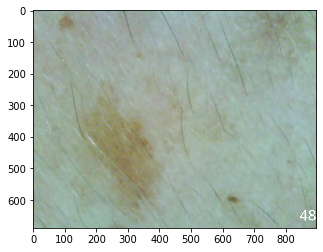

In [5]:
import matplotlib.pyplot as plt
plt.imshow(pigment_image)
plt.show()

In [6]:
pigment_image.shape

(689, 898, 3)

In [0]:
import skimage
pigment_image_resized = skimage.transform.resize(pigment_image, (192,256,3))


In [0]:
##note: in order to discern the melanin content, it will be necessary to understand how this resizing algorithm works: does it take a maximum value? What does it use?

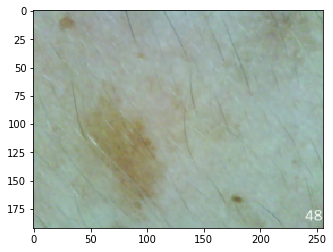

In [9]:
plt.imshow(pigment_image_resized)
plt.show()

In [10]:
type(pigment_image)

numpy.ndarray

In [0]:
import numpy as np
pigment_image_show = pigment_image_resized
pigment_image_resized = np.reshape(pigment_image_resized, [1,192,256,3])

In [12]:
import scipy
scipy.__version__

'1.0.0'

In [13]:
!pip install pillow

In [0]:
if not (scipy.__version__ == '1.0.0'):
  !pip uninstall scipy==1.3.0
  !pip install scipy==1.0.0

In [15]:
from scipy import ndimage, misc
import re
import os
#get pigmentation photos
pigs = []
for root, dirnames, filenames in os.walk("./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"): 
    for filename in filenames:
        if re.search('d*.PNG', filename):
            filepath = os.path.join(root, filename)
            pig = ndimage.imread(filepath)
            pig_resized = skimage.transform.resize(pig, (192,256,3))  #redo this size or re-size later in Tensorflow
            pigs.append(pig_resized)
            #filename = filename.split(".")
            #name = filename[0] + "2." + filename[1]
            #print(name)
            
            #new_path = os.path.join(root, name)
            #f = open(new_path, 'w+b')
            #misc.imsave(new_path, _seg_resized)
            #os.remove(filepath)
            #f.close()
pigs = np.array(pigs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [16]:
filenames 

['6--09-28-am.PNG',
 '27--11-11-pm.PNG',
 '13--10-06-am.PNG',
 '8--09-29-am.PNG',
 '22--10-25-am.PNG',
 '17--10-13-am.PNG',
 '9--09-29-pm.PNG',
 '18--10-14-am.PNG',
 '2--09-23-pm.PNG',
 '14--10-10-am.PNG',
 '20--10-18-pm.PNG',
 '3--09-25-am.PNG',
 '26--11-10-am.PNG',
 '5--09-27-pm.PNG',
 '0-0--09-22-pm.PNG',
 '15--10-11-pm.PNG',
 '12--10-04-pm.PNG',
 '1-1--09-23-am.PNG',
 '19--10-16-pm.PNG',
 '25--11-06-pm.PNG',
 '21--10-120-pm.PNG',
 '16--10-12-pm.PNG',
 '4--09-25-pm.PNG',
 '11--10-02-pm.PNG',
 '10--09-30-pm.PNG',
 '7--09-28-pm.PNG',
 '23--10-28-pm.PNG',
 '24--11-04-am.PNG']

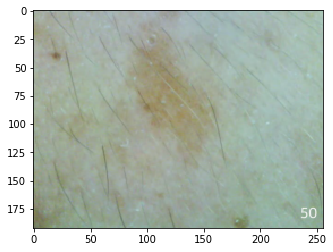

In [17]:
plt.imshow(pigs[0])


In [0]:
## I created a train-test split in the original upload of files to Google Docs, but I will merge these because I've realized that I can still use train-test split below and it will 
## randomize the photos each time

In [0]:

from skimage import data
from skimage.color import rgb2hsv, rgb2lab

In [0]:
from scipy import ndimage, misc
import re
import os
#there are 2594 photos
filenames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Training_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
           
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1-2_Testing_Input_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}].jpg', filename):
            n = re.match("ISIC_(\d*).", filename)
            filenames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [0]:
#"/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"

from scipy import ndimage, misc
import re
import os
#there are 2594 photos
labelnames_dict = {}
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Training_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
           
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
           
for root, dirnames, filenames in os.walk("/content/gdrive/My Drive/Batches/ISIC2018_Task1_Testing_GroundTruth_batches"): #/content/gdrive/My Drive/ISIC2018_Task1-2_Training_Input/ISIC2018_Task1-2_Training_Input"):
    for filename in filenames:
      if re.search('d*[^{r|f}]_segmentation.png', filename):
            n = re.match("ISIC_(\d*)_\w+", filename)
            labelnames_dict.update({n.group(1): os.path.join(root, filename)})
            

In [22]:
images = []
segs = []
for key in sorted(labelnames_dict.keys()):
  image = ndimage.imread(filenames_dict[key], mode="RGB")
  seg = ndimage.imread(labelnames_dict[key], mode="L")
  images += [image]
  segs += [seg]
  
images = np.array(images)
segs = np.array(segs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


In [23]:
segs.shape

(2594, 192, 256)

In [24]:
images.shape

(2594, 192, 256, 3)

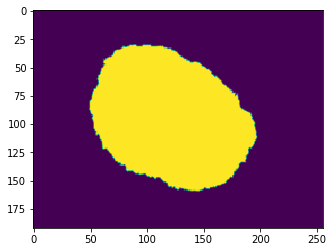

In [25]:
plt.imshow(segs[10])

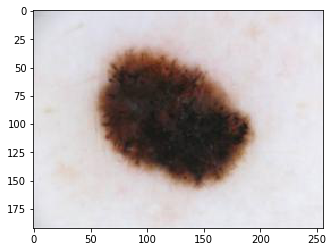

In [26]:
plt.imshow(images[10])

[[[0.17647059 0.15294118 0.2       ]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.23137255 0.22745098 0.28235294]
  [0.24313725 0.23529412 0.29019608]
  [0.25098039 0.24313725 0.29803922]]

 [[0.17254902 0.14901961 0.19607843]
  [0.18039216 0.15686275 0.20392157]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.24313725 0.23921569 0.29411765]
  [0.2627451  0.25490196 0.30980392]
  [0.2745098  0.26666667 0.32156863]]

 [[0.16862745 0.14509804 0.19215686]
  [0.16862745 0.15686275 0.19215686]
  [0.17647059 0.16470588 0.2       ]
  ...
  [0.25098039 0.25098039 0.29803922]
  [0.27058824 0.2627451  0.31764706]
  [0.28235294 0.2745098  0.32941176]]

 ...

 [[0.34117647 0.31764706 0.3254902 ]
  [0.40784314 0.38431373 0.39215686]
  [0.49411765 0.47058824 0.47843137]
  ...
  [0.45882353 0.43529412 0.45098039]
  [0.41960784 0.39607843 0.41176471]
  [0.38431373 0.36078431 0.37647059]]

 [[0.29411765 0.27058824 0.27843137]
  [0.37254902 0.34901961 0.35686275]


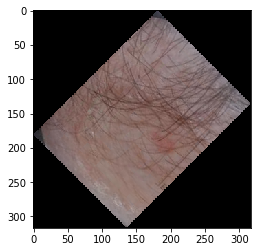

In [27]:
image = images[2580,:,:,:]/255
print(image)
rotate_image = ndimage.rotate(image, 45)
#rotate_image = misc.imresize(rotate_image, (192,256,6))
print(rotate_image)
plt.imshow(rotate_image)
plt.show()

***The images look blurry***

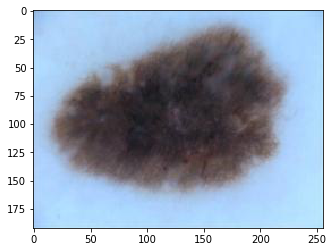

In [28]:
image = images[0,:,:,:]
plt.imshow(image)
plt.show()

In [29]:
filepath

'./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4/24--11-04-am.PNG'

In [30]:
image.shape

(192, 256, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


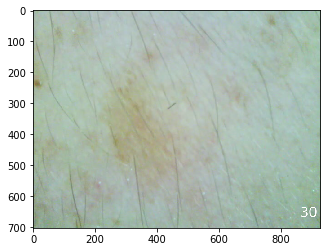

In [31]:
image = ndimage.imread(filepath, mode="RGB")
plt.imshow(image)
plt.show()

**Check some features of the data to be sure that it uploaded properly**

check whether cells are aligned

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [0]:
from sklearn.model_selection import train_test_split
trainim, testim, trainlab, testlab = train_test_split(images, segs, test_size = 0.05) #this is randomized each time the program is started and run from scratch

In [33]:
trainim.shape

(2464, 192, 256, 3)

In [34]:
np.max(testlab)

255

In [35]:
testlab.shape

(130, 192, 256)

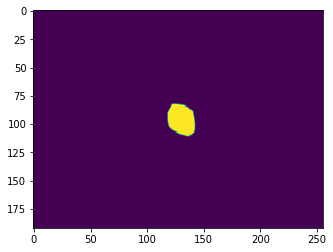

In [36]:
image = trainlab[0,:,:]
plt.imshow(image)
plt.show()

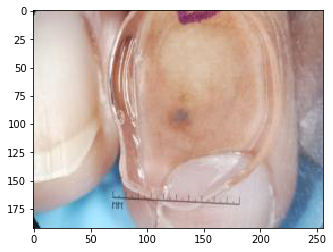

In [37]:
image = trainim[0,:,:,:]
plt.imshow(image)
plt.show()

In [0]:
def data_augmentations(features,lables,flag):
  if flag:
    #print("treat the first input image")
    #hsv_img = rgb2hsv(features[0])  #add 3 hsv channels       
    #plt.imshow(features[0])
    #plt.show()
    #plt.imshow(hsv_img)
    #plt.show()
    #print(hsv_img.dtype)
    #print(features[0].dtype)
    #print(hsv_img)
    #print(features[0])
    #l = rgb2lab(features[0])[:,:,0].reshape(192,256,1) #add the l channel from the lab space
    #image = np.concatenate((features[0]/255,hsv_img,l), axis =2)  #concatenate into one big image
    x2 = features[0].reshape([1,192,256,3]) #image.reshape([1,192,256,7])  #need to add "1" to first dimension for future concatenation
    image = features[0]
    #print("#flip the first image:")
    flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
    #plt.imshow(flip_ud_x2[0,:,:,:3])
   
    #plt.show()
    x2 = np.vstack((x2, flip_ud_x2)) 
    
    #print("#rotate the first image by a random angle")
    ra = np.random.random()*360
    rotate_x2 = ndimage.rotate(image, ra)
    #print(image)
    #print(rotate_x2)
    #plt.imshow(rotate_x2[:,:,:3])
    #plt.show()
    #print("test1")
    rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
    #plt.imshow(rotate_x2[0,:,:,:3])
    #print("test2")
    x2 = np.vstack((x2, rotate_x2 )) 
    
    #print("#treat the first label:")
    label = lables[0]
    #plt.imshow(label)
    #plt.show()
    y2 = label.reshape([1,192,256,1])
    #print("#flip the first label to match the first input image:")
    flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
    y2 = np.vstack((y2, flip_ud_y2)) 
    #plt.imshow(flip_ud_y2[0:,:,:,:])
    #plt.show()
    #print("#rotate the label by the same angle as the image")
    rotate_y2 = ndimage.rotate(label, ra)
    rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
    y2 = np.vstack((y2, rotate_y2)) 
    #plt.imshow(rotate_y2) 
    #plt.show()
  
    i = 1
    
    #print('#treat the subsequent images and labels')
    for image in features[1:]:
      #print(i)
      #plt.imshow(image)
      #plt.show()
      #hsv_img = rgb2hsv(image)  #add 3 hsv channels       
      #plt.imshow(hsv_img)
      #plt.show()
      #l = rgb2lab(image)[:,:,0].reshape(192,256,1) #add the l channel from the lab space
      #image = np.concatenate((image,hsv_img,l), axis =2)  #concatenate into one big image
      image2 = image.reshape([1,192,256,3])  #need to add "1" to first dimension for future concatenation
      
      x2 = np.vstack((x2, image2))
      #print('#flip the image:')
      flip_ud_x2 = np.flipud(image).reshape([1,192,256,3])
      x2 = np.vstack((x2, flip_ud_x2))
      #plt.imshow(flip_ud_x2[1,:,:,:3])
      #plt.show()
     
      #print('#rotate the image by a random angle')
      ra = np.random.random()*360
      rotate_x2 = ndimage.rotate(image, ra)
      rotate_x2 = skimage.transform.resize(rotate_x2, (1,192,256,3))
      x2 = np.vstack((x2, rotate_x2))
      #plt.imshow(rotate_x2[0,:,:,:3])
      #plt.show()
      
     
      #print('#treat the corresponding label:')
      label = lables[i]
      label2 = lables[i].reshape([1,192,256,1])
      #plt.imshow(label)
      #plt.show()
     
      y2 = np.vstack((y2,label2))
      #print('#flip the corresponding label to match the input image:')
      flip_ud_y2 = np.flipud(label).reshape([1,192,256,1])
      y2 = np.vstack((y2,flip_ud_y2))
      #plt.imshow(flip_ud_y2[0,:,:,:])
      #plt.show()
      
      
      #print('#rotate the label by the same angle as the image')
      rotate_y2 = ndimage.rotate(label, ra)
      rotate_y2 = skimage.transform.resize(rotate_y2, (1,192,256,1))
      y2 = np.vstack((y2,rotate_y2))
      #plt.imshow(rotate_y2) 
      #plt.show()
      
      #print('#scale images to 0-1 interval')
    x2 = x2/255
    y2 = y2/255
  else:
     x2 = features/255
     y2 = lables/255
  return x2, y2
    
  

In [0]:
class MelHelper():
    
    def __init__(self):
        self.i = 0
        
        ####Can probably eliminate this part ####
        
        # Grabs a list of all the data batches for training
        #self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        #self.test_batch = [test_batch]
        
        ###eliminate####
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
       
        self.training_images = trainim   #normalize only ->replace with images with training set later
                                #self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
       
        self.training_labels = np.around(trainlab) #one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        
        
        
      
        self.test_images, labls = data_augmentations(testim, testlab,0)
        self.test_labels = labls.reshape((labls.shape[0],192,256))
       
        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100 - this is now a mistake
        xtra = (self.i + batch_size) % len(self.training_images)
        if xtra<batch_size and xtra != 0:
            x = np.vstack((self.training_images[self.i:self.i+batch_size], self.training_images[0:xtra])) #.reshape(100,32,32,3)  #why is this necessary?
            y = np.vstack((self.training_labels[self.i:self.i+batch_size], self.training_labels[0:xtra]))
        else:
            x = self.training_images[self.i:self.i+batch_size] #.reshape(100,32,32,3)  #why is this necessary?
            y = self.training_labels[self.i:self.i+batch_size]
        #print(x.shape)
        x,y = data_augmentations(x,y,0)
        y = y.reshape((y.shape[0],192,256))
        self.i = xtra 
        return x, y

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def deconv2d(x, shape):
    return tf.layers.conv2d_transpose(x, shape[3], shape[0:2], padding = 'SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [0]:
def convolutional_layer(input_x, shape):
    if input_x.shape[0]==1:
      training = False
    else: training = True
    W = init_weights(shape)
    b = init_bias([shape[3]])
    c = conv2d(input_x, W) + b   ###put batch normalization here because it should include the weights
    bnc = tf.layers.batch_normalization(c, training = training)
    return tf.nn.relu(bnc)

This is a normal fully connected layer

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
def deconvolutional_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    bnd = tf.layers.batch_normalization(d, training = training)
    return tf.nn.relu(bnd)

In [0]:
def output_layer(input_x, shape):
    #W = init_weights(shape)
    if input_x.shape[0]==1:
      training = False
    else: training = True
    b = init_bias([shape[3]])  #draw this out to see if it makes sense
    d = deconv2d(input_x, shape) +b
    
    return tf.nn.sigmoid(d)

In [49]:
images.shape

(2594, 192, 256, 3)

### Placeholders

In [0]:
x = tf.placeholder(tf.float32,shape=[None,192,256,images.shape[3]])  #trace the shaping of these through the code...


In [0]:

y_true = tf.placeholder(tf.float32,shape=[None,192,256])  #this now has every pixel in the ground truth segmentation

### Layers

In [0]:
x_image = tf.reshape(x,[-1,192,256,images.shape[3]])  #-1 infers the shape of the first dimension (here, the batch size)

In [53]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[3,3,images.shape[3],16])
convo_12 = convolutional_layer(convo_1,shape=[3,3,16,32])
convo_1_pooling = max_pool_2by2(convo_12)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.


In [54]:
print(convo_1_pooling.shape)

(?, 96, 128, 32)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[3,3,32,64])
convo_22 = convolutional_layer(convo_2,shape=[3,3,64,64])
convo_2_pooling = max_pool_2by2(convo_22)

In [56]:
print(convo_2_pooling.shape)

(?, 48, 64, 64)


In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
## You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_32 = convolutional_layer(convo_3,shape=[3,3,128,128])
convo_3_pooling = max_pool_2by2(convo_32)

In [58]:
print(convo_3_pooling.shape)

(?, 24, 32, 128)


In [59]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
hold_prob = tf.placeholder(tf.float32)

convo_3_pooling_d = tf.nn.dropout(convo_3_pooling,keep_prob=hold_prob)


convo_4 = convolutional_layer(convo_3_pooling_d,shape=[3,3,128,256])
convo_42 = convolutional_layer(convo_4,shape=[3,3,256,256])
convo_4_pooling = max_pool_2by2(convo_42)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
print(convo_4_pooling.shape)

(?, 12, 16, 256)


In [0]:
convo_5 = convolutional_layer(convo_4_pooling,shape=[3,3,256,512])
#convo_5_pooling = max_pool_2by2(convo_5)

In [62]:
print(convo_5.shape)

(?, 12, 16, 512)


In [0]:
#convo_6 = convolutional_layer(convo_5,shape=[3,3,128,256])
#convo_6_pooling = max_pool_2by2(convo_6)

In [0]:
#print(convo_6.shape)

###Need to look at the shapes and sizes of all of these layers###

In [65]:
#import keras
deconv_1 = deconvolutional_layer(convo_5, shape = [3,3,512,256])
H = deconv_1.shape[1]
W = deconv_1.shape[2]
ups_1 = tf.image.resize_nearest_neighbor(deconv_1, size = [2*H,2*W])
print(ups_1.shape)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
(?, 24, 32, 256)


In [66]:
deconv_2 = deconvolutional_layer(ups_1, shape = [3,3,256,256])
deconv_22 = deconvolutional_layer(deconv_2, shape = [3,3,256,128])
H = deconv_22.shape[1]
W = deconv_22.shape[2]
ups_2 = tf.image.resize_nearest_neighbor(deconv_22, size = [2*H,2*W])
print(ups_2.shape)

(?, 48, 64, 128)


In [67]:
deconv_3 = deconvolutional_layer(ups_2, shape = [4,4,128,128])
deconv_32 = deconvolutional_layer(deconv_3, shape = [3,3,128,128])
H = deconv_32.shape[1]
W = deconv_32.shape[2]
ups_3 = tf.image.resize_nearest_neighbor(deconv_32, size = [2*H,2*W])
print(ups_3.shape)

(?, 96, 128, 128)


In [68]:
deconv_4 = deconvolutional_layer(ups_3, shape = [3,3,128,64])
deconv_42 = deconvolutional_layer(deconv_4, shape = [3,3,64,32])
H = deconv_42.shape[1]
W = deconv_42.shape[2]
ups_4 = tf.image.resize_nearest_neighbor(deconv_42, size = [2*H,2*W])
print(ups_4.shape)

(?, 192, 256, 32)


In [69]:
hold_prob2 = tf.placeholder(tf.float32)

ups_4_d = tf.nn.dropout(ups_4,keep_prob=hold_prob2)

deconv_5 = deconvolutional_layer(ups_4_d, shape = [3,3,32,16])
print(deconv_5.shape)
output = output_layer(deconv_5, shape = [3,3,16,1])
#print(deconv_52.shape)
#output = tf.image.resize_nearest_neighbor(deconv_52, size = [192,256])   #not sure what sort of output layer is used in the winning submission

(?, 192, 256, 16)


In [70]:
deconv_5.shape

TensorShape([Dimension(None), Dimension(192), Dimension(256), Dimension(16)])

In [0]:
y_pred = output

### Loss Function

In [0]:
pred = tf.reshape(y_pred, [-1,192,256])
true = tf.reshape(y_true, [-1,192,256])
          

intersect = tf.reduce_sum(tf.cast(true*pred, tf.float32), axis = [1,2])
sum_pred = tf.reduce_sum(tf.cast(pred*pred, tf.float32), axis = [1,2])
sum_true = tf.reduce_sum(tf.cast(true*true, tf.float32), axis = [1,2])
union = sum_pred + sum_true - intersect  
jacc = intersect/union
            


#cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=pred))

This will be updated to a loss function based on the jaccard index, as in the related publication

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.003)
#cost = -tf.reduce_mean(tf.nn.sigmoid(jacc))
cost =  tf.reduce_mean(tf.nn.relu(0.78 - jacc))
train = optimizer.minimize(cost)   #can this be done for each pixel?

### Intialize Variables

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

### Session

In [76]:
mel = MelHelper()
mel.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [77]:
tf.math.exp(1.)

<tf.Tensor 'Exp:0' shape=() dtype=float32>

starting init
done init
Currently on step 0
the time is  3.016445000000001 

Avg Jacc is:


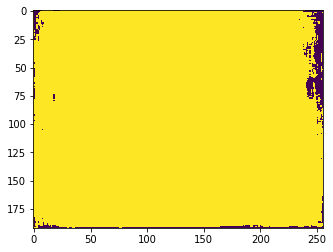

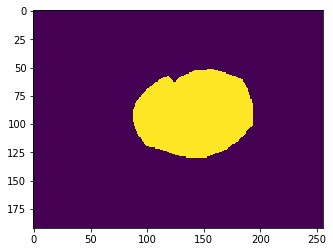

0.29045859116774336  step number is  0  batch_size is  16
Currently on step 100
the time is  15.575107 

Avg Jacc is:


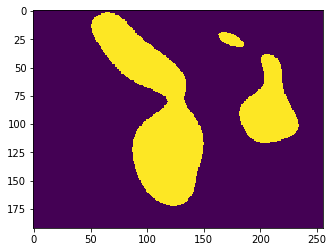

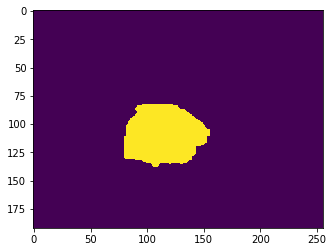

0.5901285024789663  step number is  100  batch_size is  16
Currently on step 200
the time is  26.690223999999997 

Avg Jacc is:


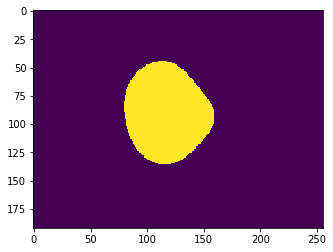

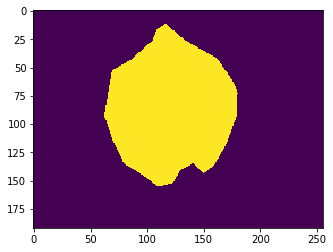

0.6153076171875  step number is  200  batch_size is  16
Currently on step 300
the time is  37.79894899999999 

Avg Jacc is:


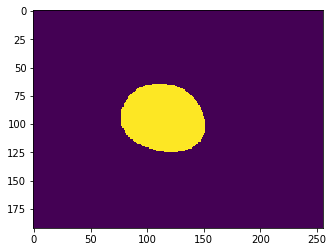

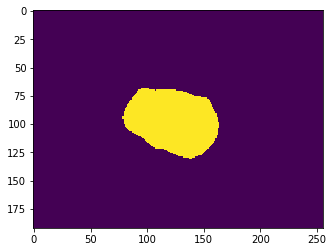

0.606047116793119  step number is  300  batch_size is  16
Currently on step 400
the time is  48.970117 

Avg Jacc is:


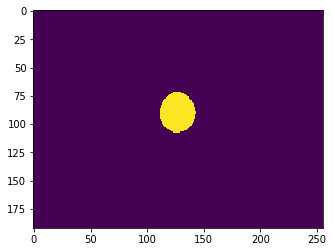

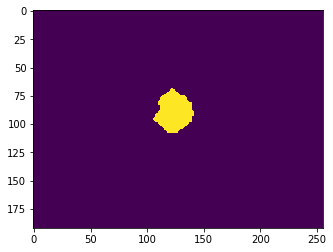

0.6349123441256009  step number is  400  batch_size is  16
Currently on step 500
the time is  60.037385 

Avg Jacc is:


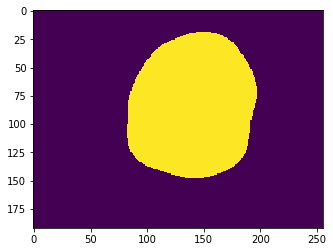

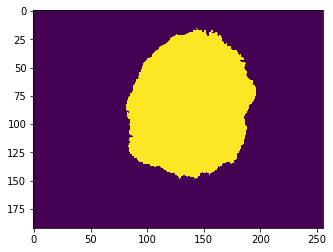

0.695413325383113  step number is  500  batch_size is  16
Currently on step 600
the time is  71.14830500000001 

Avg Jacc is:


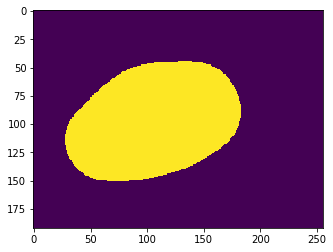

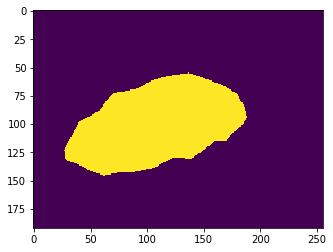

0.6761496910682091  step number is  600  batch_size is  16
Currently on step 700
the time is  82.16938900000001 

Avg Jacc is:


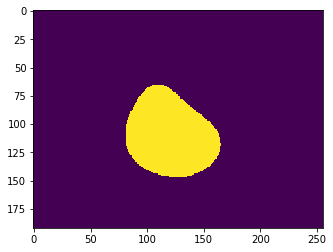

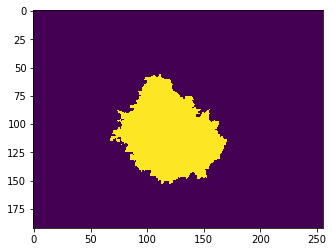

0.652609135554387  step number is  700  batch_size is  16
Currently on step 800
the time is  93.242295 

Avg Jacc is:


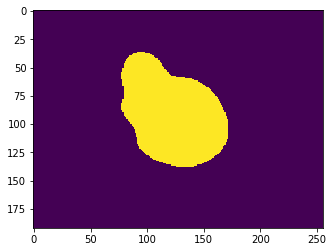

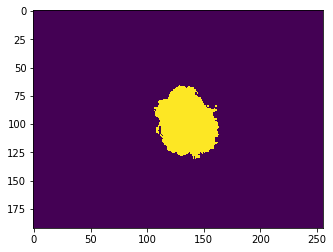

0.7132465069110577  step number is  800  batch_size is  16
Currently on step 900
the time is  104.40395000000001 

Avg Jacc is:


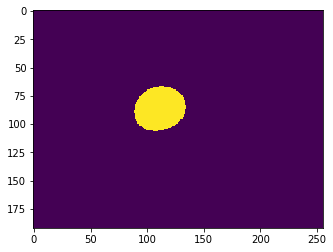

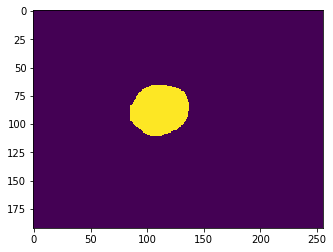

0.7235299917367789  step number is  900  batch_size is  16
Currently on step 1000
the time is  115.42224100000001 

Avg Jacc is:


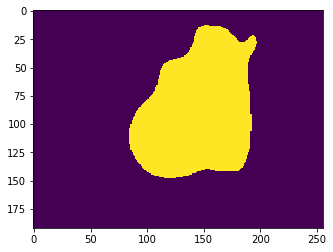

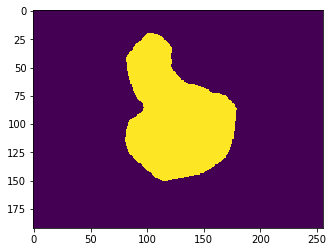

0.7271469116210938  step number is  1000  batch_size is  16
Currently on step 1100
the time is  126.48402200000001 

Avg Jacc is:


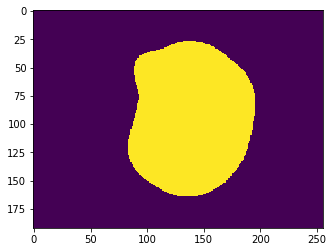

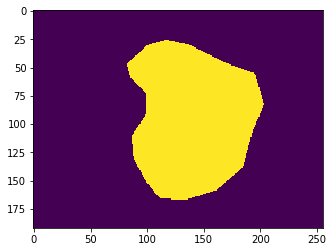

0.6742179870605469  step number is  1100  batch_size is  16
Currently on step 1200
the time is  137.541647 

Avg Jacc is:


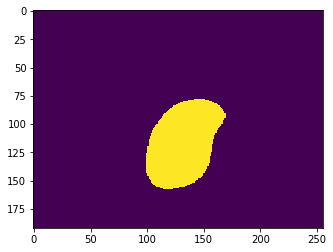

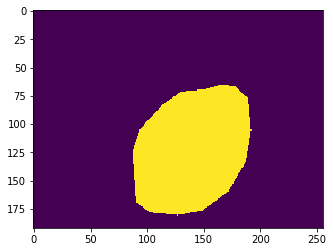

0.7179483266977164  step number is  1200  batch_size is  16
Currently on step 1300
the time is  148.590577 

Avg Jacc is:


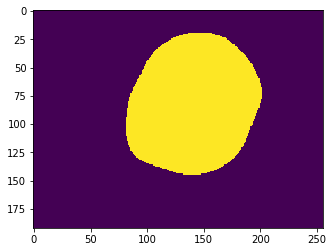

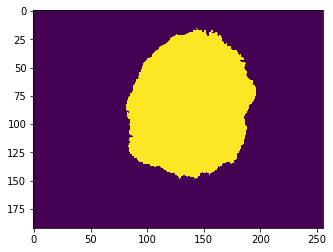

0.7251741262582633  step number is  1300  batch_size is  16
Currently on step 1400
the time is  159.71679600000002 

Avg Jacc is:


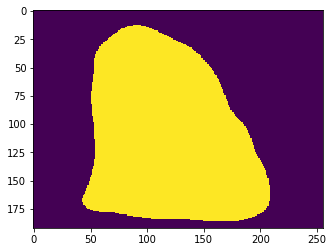

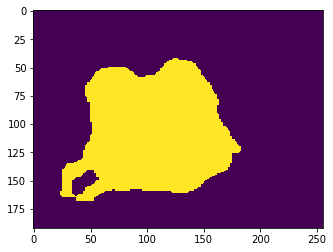

0.7336489750788762  step number is  1400  batch_size is  16
Currently on step 1500
the time is  170.853432 

Avg Jacc is:


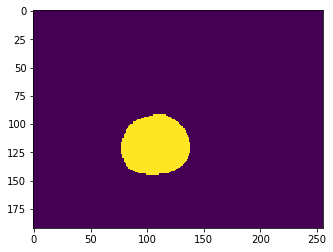

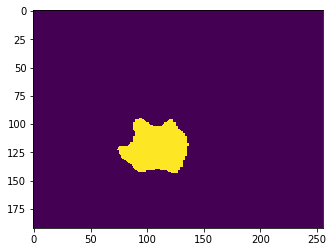

0.6993770305926983  step number is  1500  batch_size is  16
Currently on step 1600
the time is  181.900819 

Avg Jacc is:


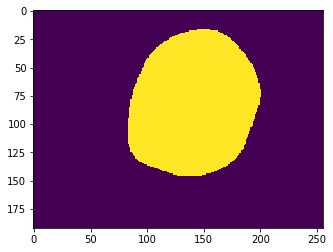

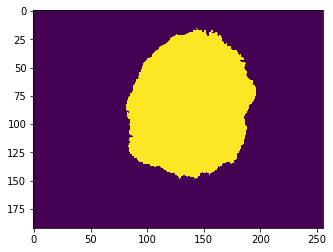

0.7277992835411659  step number is  1600  batch_size is  16
Currently on step 1700
the time is  192.968505 

Avg Jacc is:


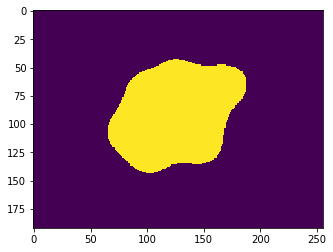

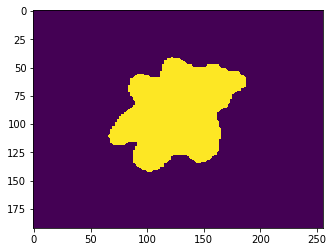

0.7338121854341947  step number is  1700  batch_size is  16
Currently on step 1800
the time is  204.015206 

Avg Jacc is:


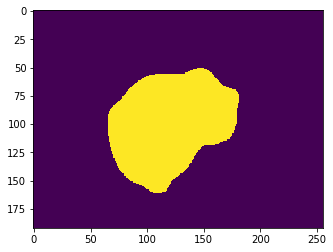

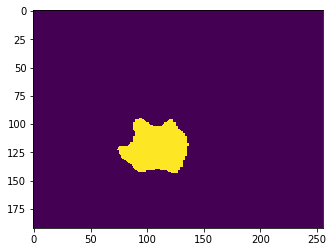

0.7447821397047777  step number is  1800  batch_size is  16
Currently on step 1900
the time is  215.081705 

Avg Jacc is:


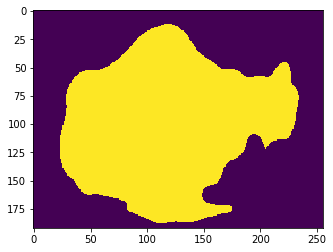

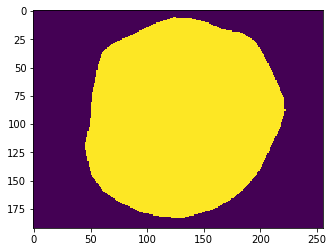

0.7460699815016526  step number is  1900  batch_size is  16
Currently on step 2000
the time is  226.281813 

Avg Jacc is:


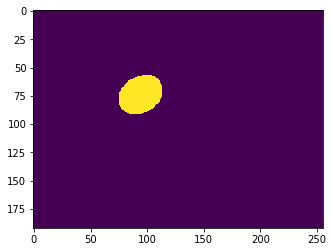

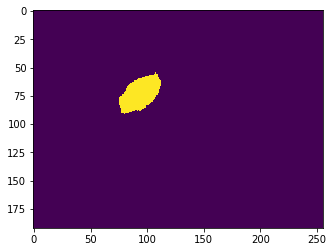

0.7425649789663461  step number is  2000  batch_size is  16
Currently on step 2100
the time is  237.3375 

Avg Jacc is:


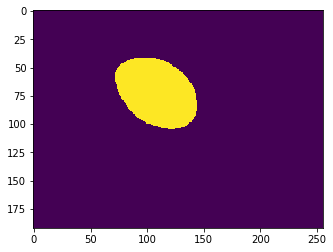

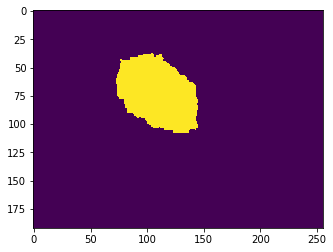

0.7484000572791466  step number is  2100  batch_size is  16
Currently on step 2200
the time is  248.47507 

Avg Jacc is:


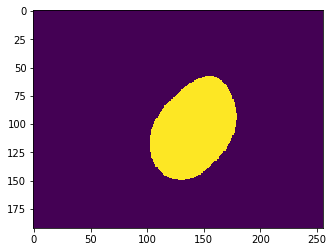

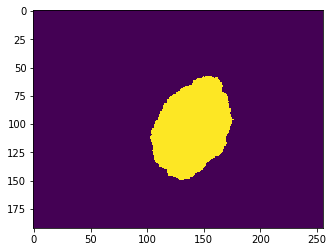

0.7249320397010216  step number is  2200  batch_size is  16
Currently on step 2300
the time is  259.588597 

Avg Jacc is:


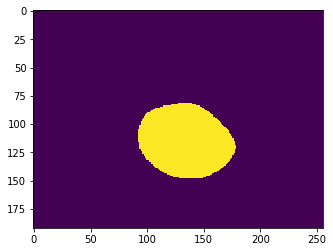

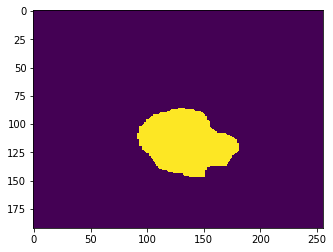

0.7478122417743389  step number is  2300  batch_size is  16
Currently on step 2400
the time is  270.659159 

Avg Jacc is:


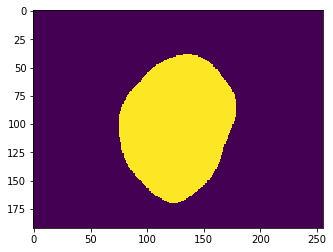

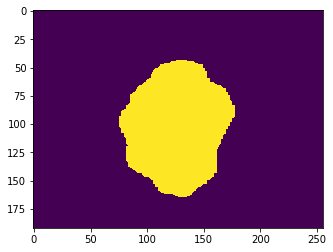

0.7354962862454928  step number is  2400  batch_size is  16
Currently on step 2500
the time is  281.92193899999995 

Avg Jacc is:


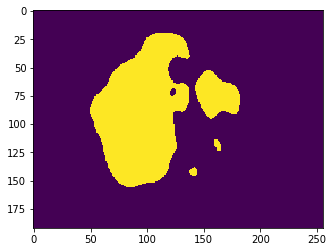

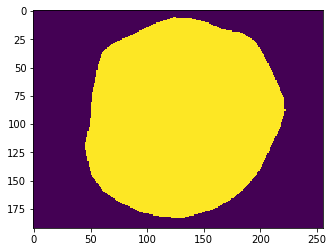

0.7490181556114783  step number is  2500  batch_size is  16
Currently on step 2600
the time is  292.98878299999996 

Avg Jacc is:


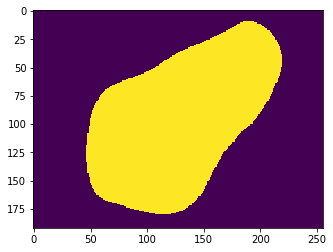

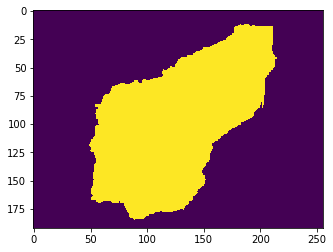

0.7565799419696514  step number is  2600  batch_size is  16
Currently on step 2700
the time is  304.08887 

Avg Jacc is:


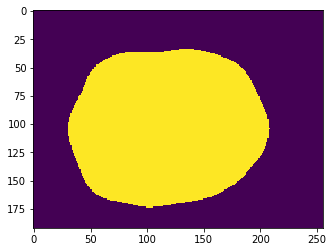

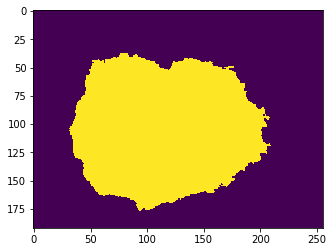

0.7128468440129206  step number is  2700  batch_size is  16
Currently on step 2800
the time is  315.203351 

Avg Jacc is:


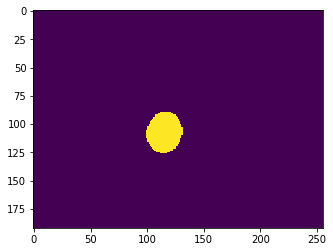

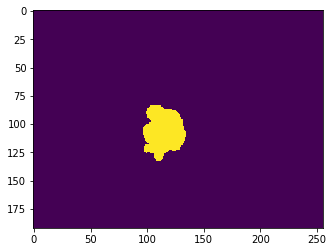

0.7341900165264423  step number is  2800  batch_size is  16
Currently on step 2900
the time is  326.33232699999996 

Avg Jacc is:


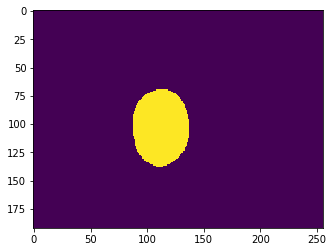

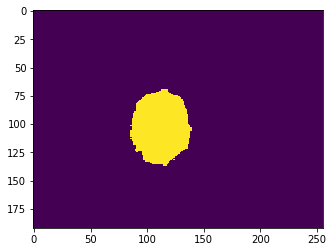

0.7473738450270433  step number is  2900  batch_size is  16
Currently on step 3000
the time is  337.41245699999996 

Avg Jacc is:


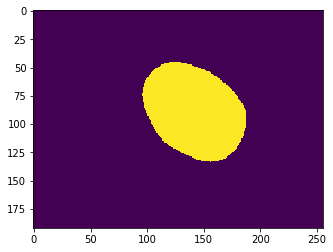

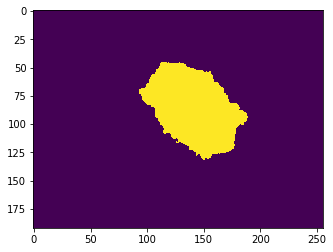

0.7534386854905348  step number is  3000  batch_size is  16
Currently on step 3100
the time is  348.50831999999997 

Avg Jacc is:


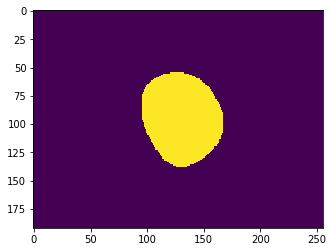

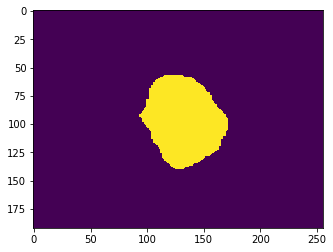

0.7305706904484676  step number is  3100  batch_size is  16
Currently on step 3200
the time is  359.624871 

Avg Jacc is:


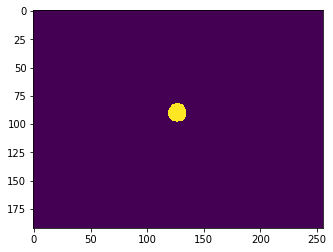

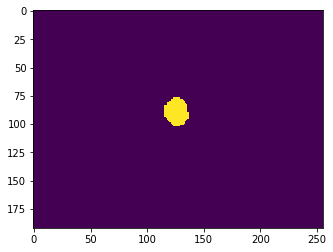

0.721603276179387  step number is  3200  batch_size is  16
Currently on step 3300
the time is  370.732379 

Avg Jacc is:


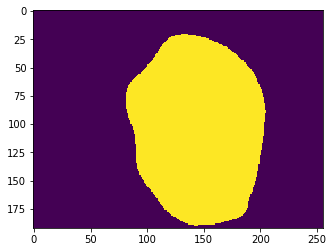

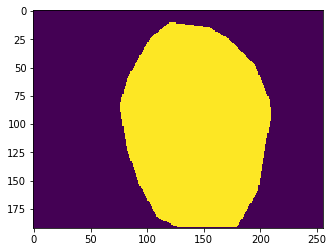

0.7358365572415866  step number is  3300  batch_size is  16
Currently on step 3400
the time is  381.80143999999996 

Avg Jacc is:


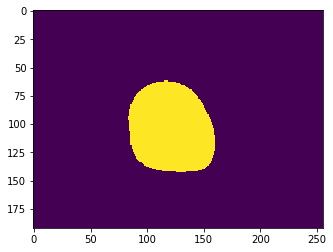

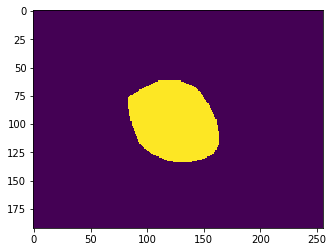

0.7438114459698016  step number is  3400  batch_size is  16
Currently on step 3500
the time is  392.872575 

Avg Jacc is:


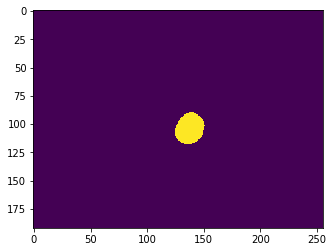

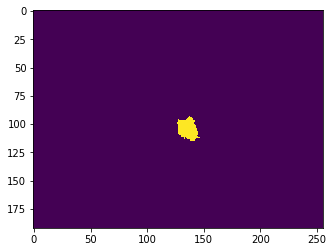

0.7514991173377403  step number is  3500  batch_size is  16
Currently on step 3600
the time is  403.93066 

Avg Jacc is:


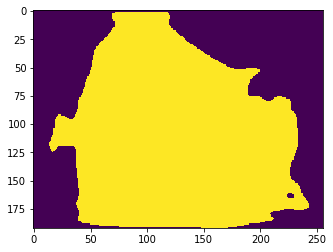

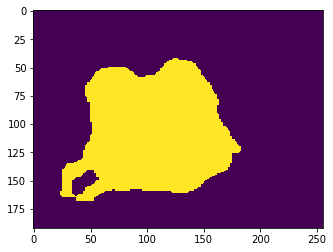

0.7488462594839242  step number is  3600  batch_size is  16
Currently on step 3700
the time is  414.982336 

Avg Jacc is:


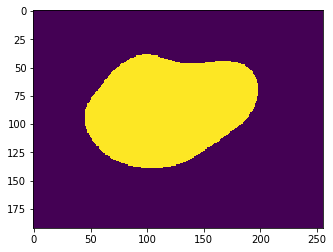

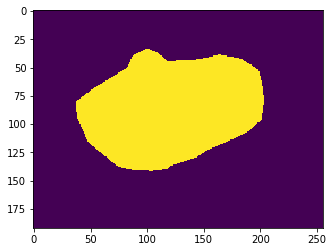

0.7593960101787861  step number is  3700  batch_size is  16
Currently on step 3800
the time is  426.21093399999995 

Avg Jacc is:


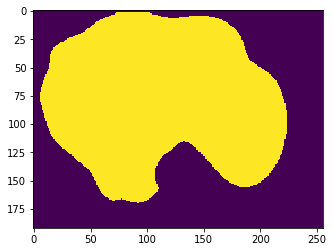

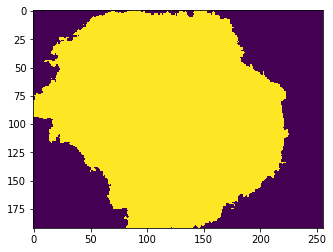

0.7591440640963041  step number is  3800  batch_size is  16
Currently on step 3900
the time is  437.36199999999997 

Avg Jacc is:


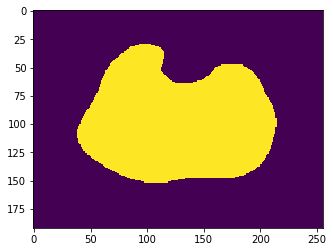

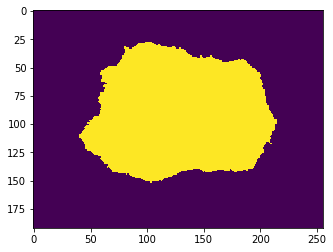

0.7429284902719351  step number is  3900  batch_size is  16
Currently on step 4000
the time is  448.608687 

Avg Jacc is:


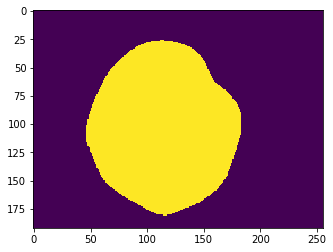

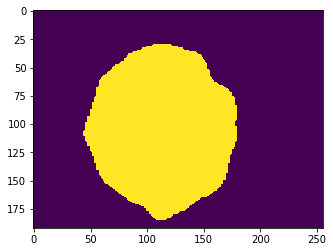

0.7655494103064904  step number is  4000  batch_size is  16
Currently on step 4100
the time is  459.656531 

Avg Jacc is:


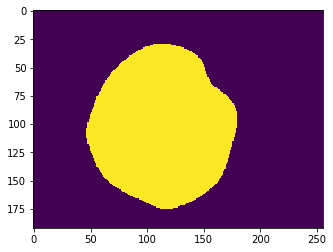

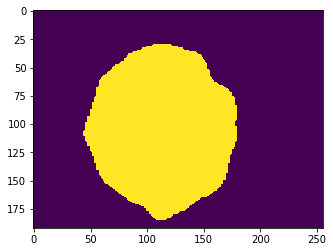

0.7192781888521634  step number is  4100  batch_size is  16
Currently on step 4200
the time is  470.74157199999996 

Avg Jacc is:


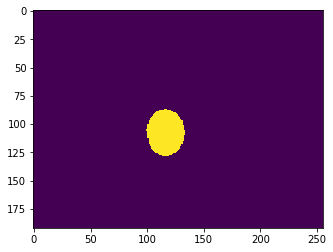

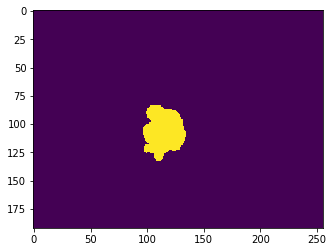

0.7558944702148438  step number is  4200  batch_size is  16
Currently on step 4300
the time is  481.915712 

Avg Jacc is:


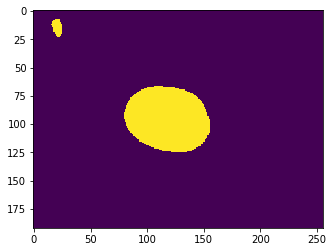

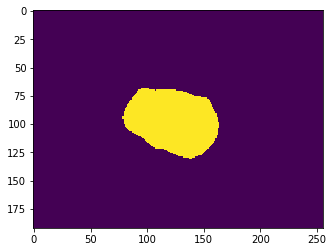

0.7573683518629808  step number is  4300  batch_size is  16
Currently on step 4400
the time is  493.05691799999994 

Avg Jacc is:


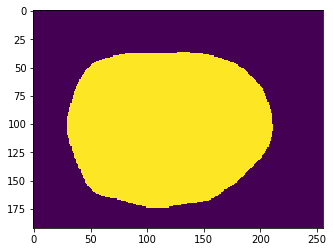

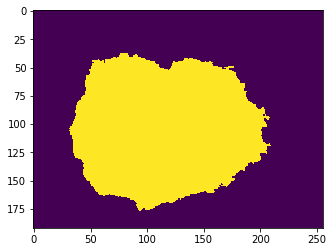

0.7573594313401443  step number is  4400  batch_size is  16
Currently on step 4500
the time is  504.171368 

Avg Jacc is:


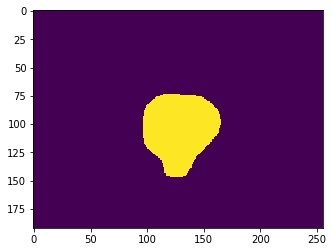

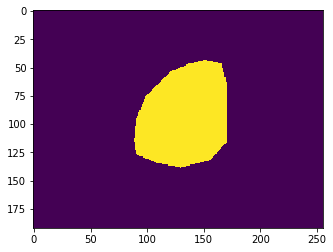

0.7524424626277043  step number is  4500  batch_size is  16
Currently on step 4600
the time is  515.3126570000001 

Avg Jacc is:


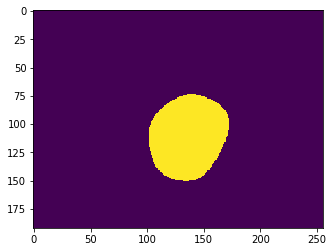

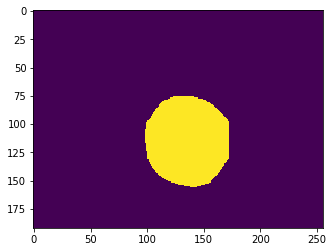

0.7526707575871394  step number is  4600  batch_size is  16
Currently on step 4700
the time is  526.432224 

Avg Jacc is:


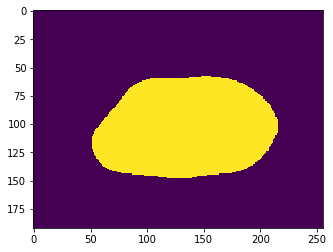

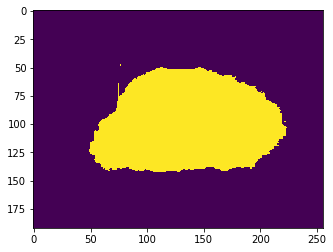

0.7413030771108774  step number is  4700  batch_size is  16
Currently on step 4800
the time is  537.5211790000001 

Avg Jacc is:


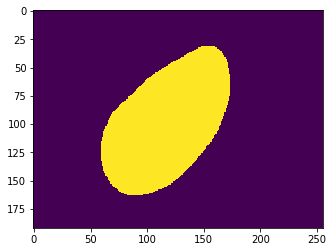

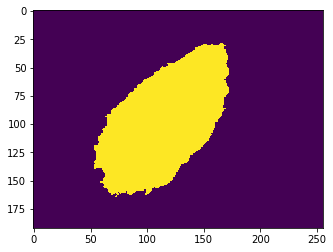

0.759695786696214  step number is  4800  batch_size is  16
Currently on step 4900
the time is  548.685604 

Avg Jacc is:


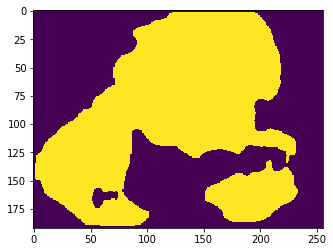

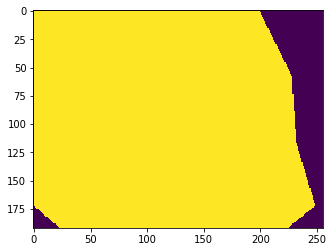

0.774949939434345  step number is  4900  batch_size is  16
Currently on step 5000
the time is  559.803586 

Avg Jacc is:


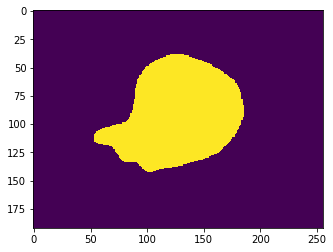

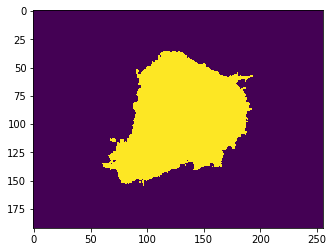

0.7485068688025841  step number is  5000  batch_size is  16
Currently on step 5100
the time is  570.9632710000001 

Avg Jacc is:


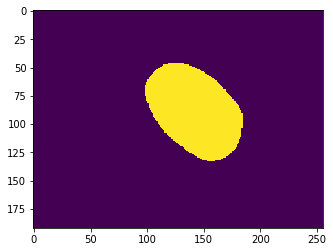

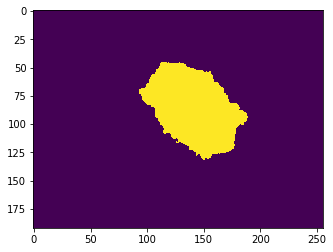

0.7544724684495192  step number is  5100  batch_size is  16
Currently on step 5200
the time is  582.192251 

Avg Jacc is:


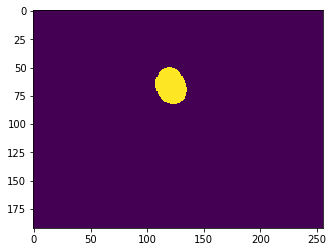

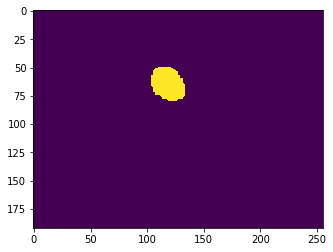

0.7331556466909556  step number is  5200  batch_size is  16
Currently on step 5300
the time is  593.4404000000001 

Avg Jacc is:


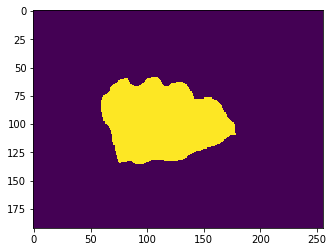

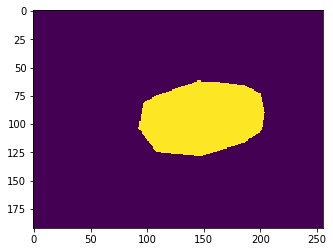

0.7359294011042669  step number is  5300  batch_size is  16
Currently on step 5400
the time is  604.717694 

Avg Jacc is:


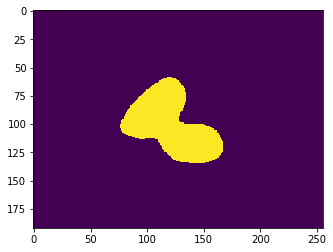

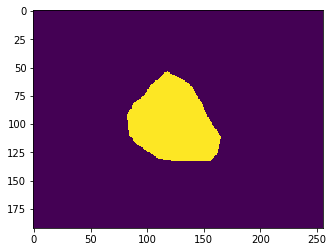

0.7473443838266226  step number is  5400  batch_size is  16
Currently on step 5500
the time is  615.88437 

Avg Jacc is:


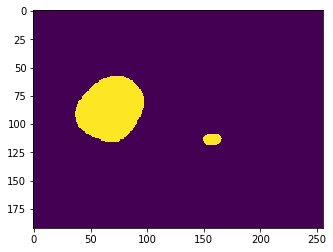

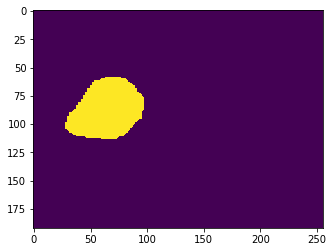

0.7626210139347956  step number is  5500  batch_size is  16
Currently on step 5600
the time is  627.183305 

Avg Jacc is:


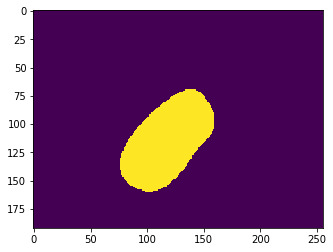

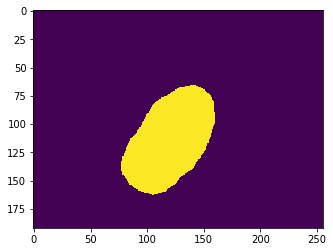

0.7594370915339543  step number is  5600  batch_size is  16
Currently on step 5700
the time is  638.309848 

Avg Jacc is:


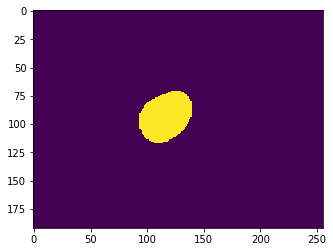

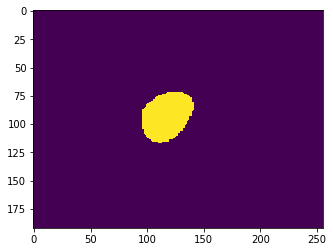

0.7661414513221154  step number is  5700  batch_size is  16
Currently on step 5800
the time is  649.4342320000001 

Avg Jacc is:


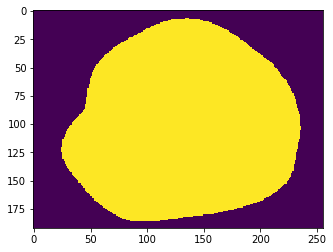

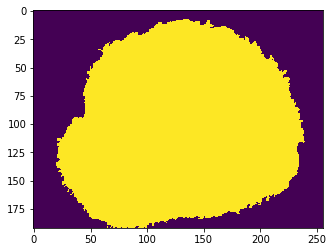

0.7462618901179388  step number is  5800  batch_size is  16
Currently on step 5900
the time is  660.655258 

Avg Jacc is:


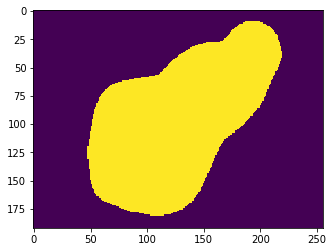

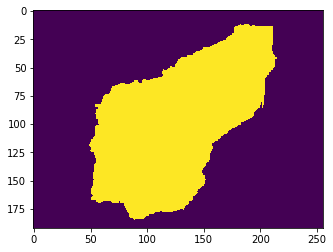

0.7545123173640325  step number is  5900  batch_size is  16
Currently on step 6000
the time is  671.8677680000001 

Avg Jacc is:


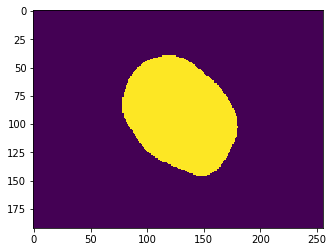

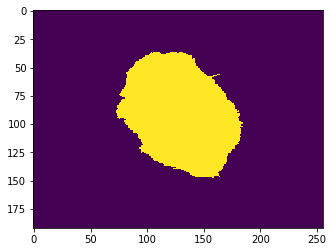

0.753746326153095  step number is  6000  batch_size is  16
Currently on step 6100
the time is  683.14997 

Avg Jacc is:


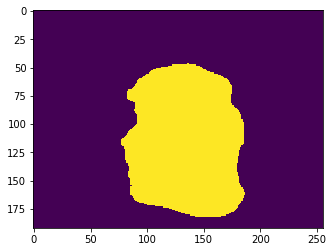

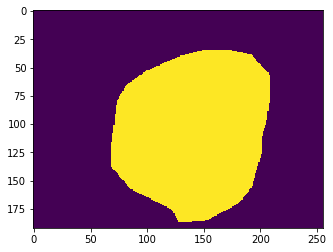

0.7560229961688701  step number is  6100  batch_size is  16
Currently on step 6200
the time is  694.404128 

Avg Jacc is:


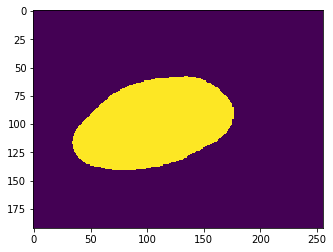

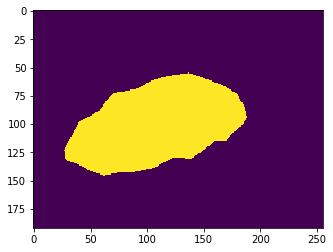

0.7420126108022836  step number is  6200  batch_size is  16
Currently on step 6300
the time is  705.551971 

Avg Jacc is:


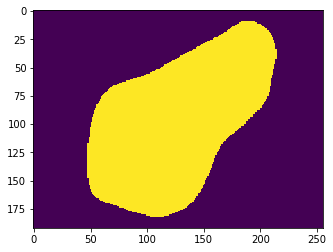

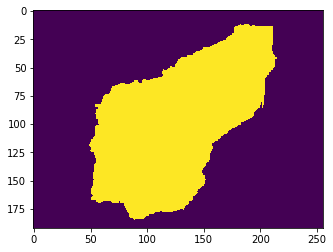

0.7746175325833834  step number is  6300  batch_size is  16
Currently on step 6400
the time is  716.735708 

Avg Jacc is:


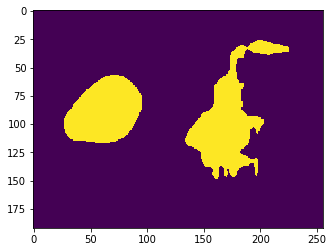

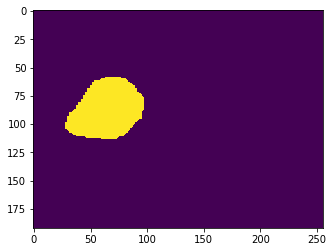

0.7343741196852464  step number is  6400  batch_size is  16
Currently on step 6500
the time is  727.923584 

Avg Jacc is:


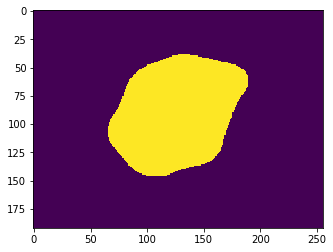

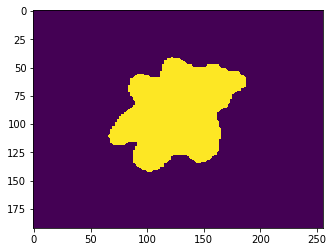

0.7525674673227164  step number is  6500  batch_size is  16
Currently on step 6600
the time is  739.107155 

Avg Jacc is:


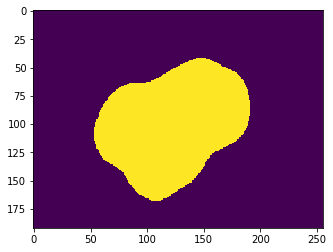

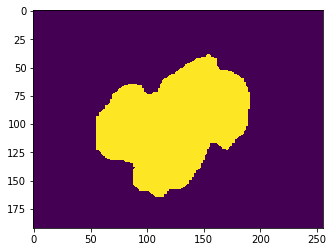

0.7755283649151142  step number is  6600  batch_size is  16
Currently on step 6700
the time is  750.326849 

Avg Jacc is:


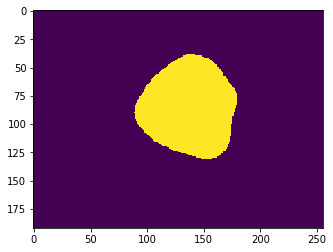

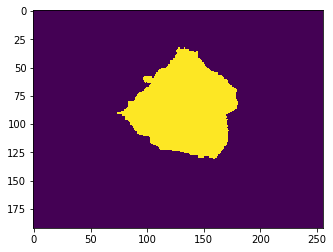

0.7381104689378005  step number is  6700  batch_size is  16
Currently on step 6800
the time is  761.5062780000001 

Avg Jacc is:


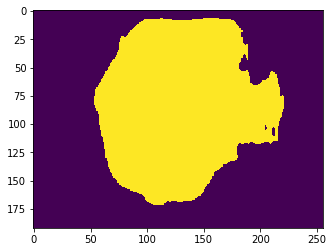

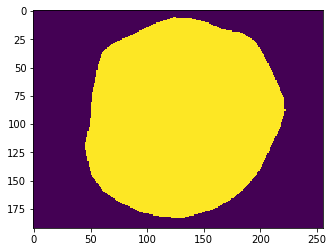

0.76015625  step number is  6800  batch_size is  16
Currently on step 6900
the time is  772.693027 

Avg Jacc is:


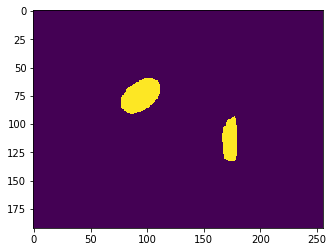

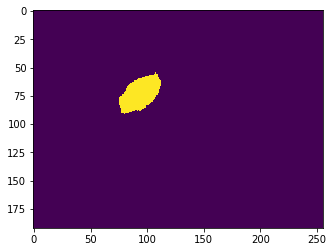

0.7607827406663161  step number is  6900  batch_size is  16
Currently on step 7000
the time is  783.86537 

Avg Jacc is:


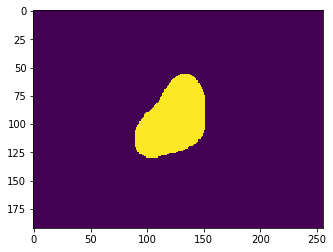

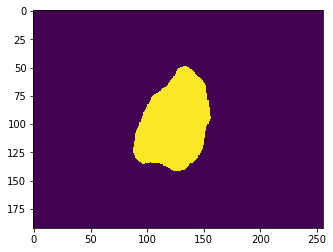

0.7631885235126202  step number is  7000  batch_size is  16
Currently on step 7100
the time is  795.033494 

Avg Jacc is:


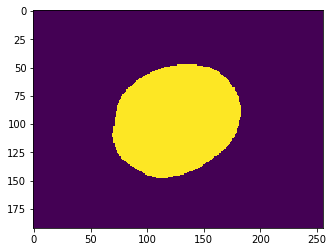

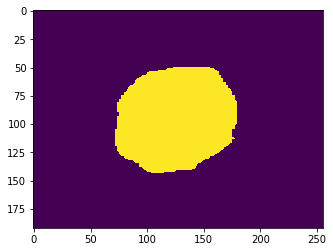

0.7589687640850361  step number is  7100  batch_size is  16
Currently on step 7200
the time is  806.381792 

Avg Jacc is:


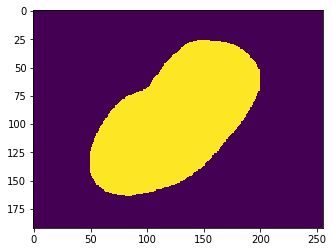

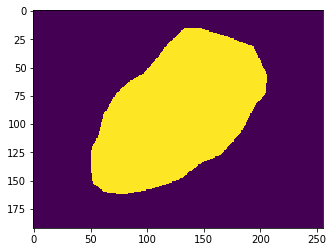

0.7717739398662861  step number is  7200  batch_size is  16
Currently on step 7300
the time is  817.528576 

Avg Jacc is:


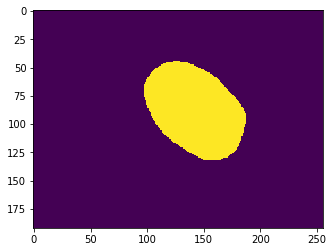

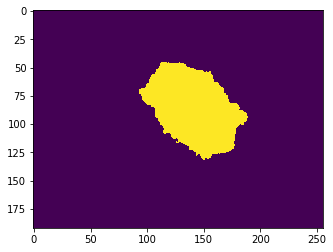

0.7786249014047476  step number is  7300  batch_size is  16
Currently on step 7400
the time is  828.7596940000001 

Avg Jacc is:


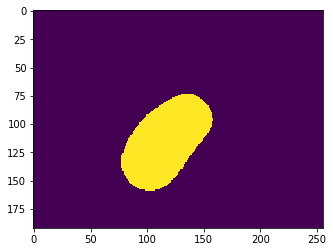

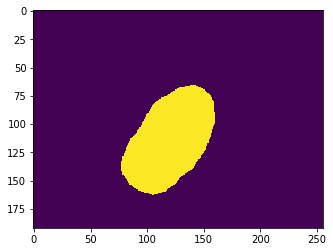

0.7667808532714844  step number is  7400  batch_size is  16
Currently on step 7500
the time is  840.002787 

Avg Jacc is:


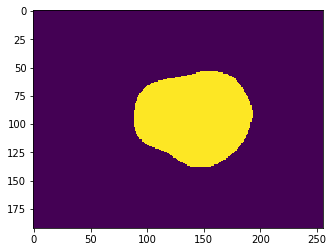

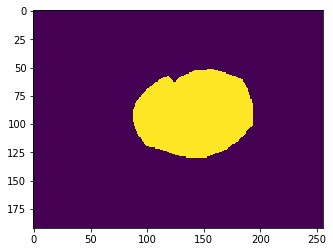

0.7671778752253606  step number is  7500  batch_size is  16
Currently on step 7600
the time is  851.2139090000001 

Avg Jacc is:


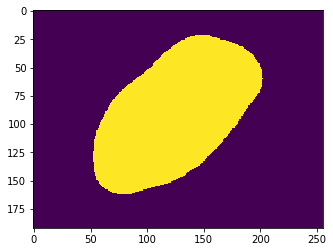

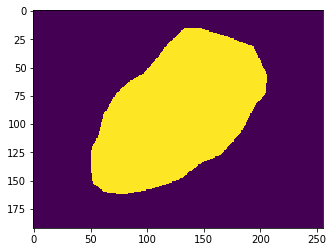

0.7616214458759014  step number is  7600  batch_size is  16
Currently on step 7700
the time is  862.452848 

Avg Jacc is:


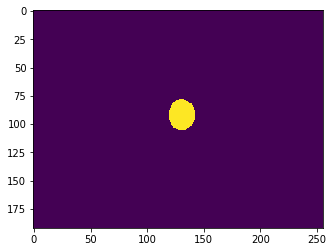

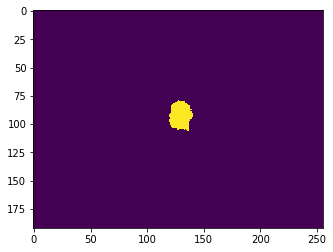

0.7490843552809495  step number is  7700  batch_size is  16
Currently on step 7800
the time is  873.714049 

Avg Jacc is:


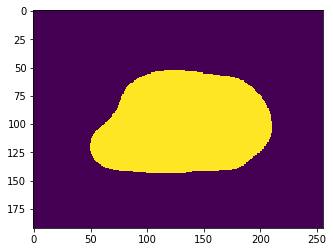

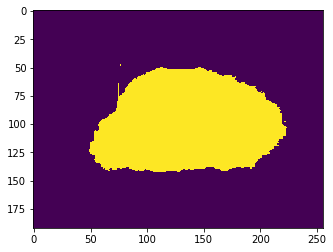

0.7413270216721755  step number is  7800  batch_size is  16
Currently on step 7900
the time is  884.926543 

Avg Jacc is:


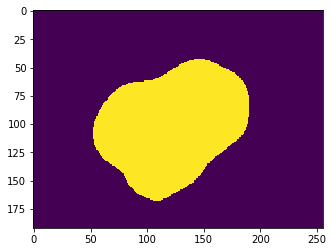

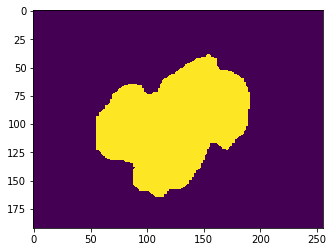

0.7676003089317909  step number is  7900  batch_size is  16
Currently on step 8000
the time is  896.09234 

Avg Jacc is:


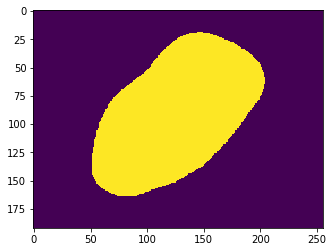

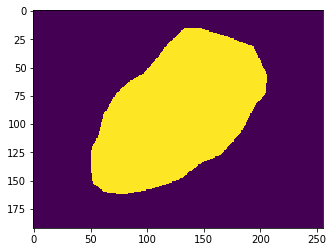

0.7655321561373197  step number is  8000  batch_size is  16
Currently on step 8100
the time is  907.1979140000001 

Avg Jacc is:


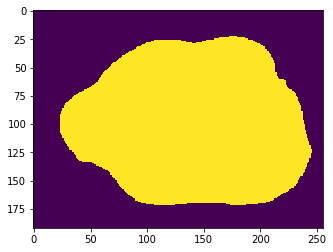

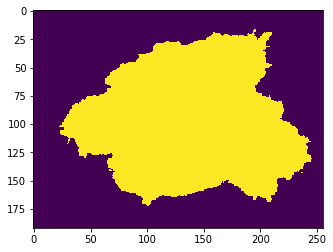

0.7441970825195312  step number is  8100  batch_size is  16
Currently on step 8200
the time is  918.3630350000001 

Avg Jacc is:


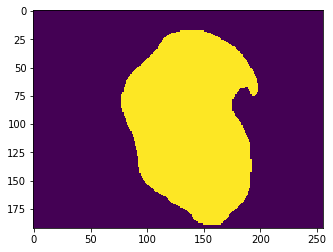

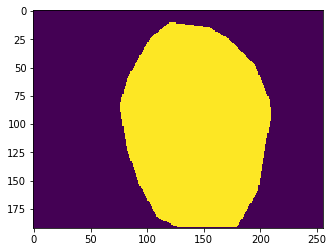

0.7443931579589844  step number is  8200  batch_size is  16
Currently on step 8300
the time is  929.518469 

Avg Jacc is:


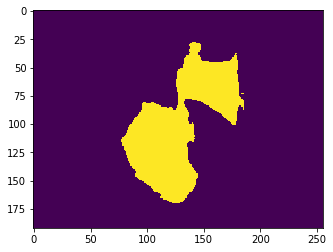

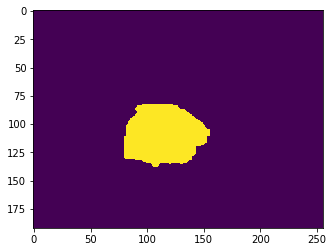

0.7648095937875601  step number is  8300  batch_size is  16
Currently on step 8400
the time is  940.643693 

Avg Jacc is:


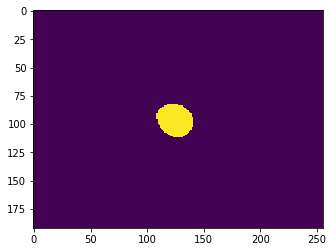

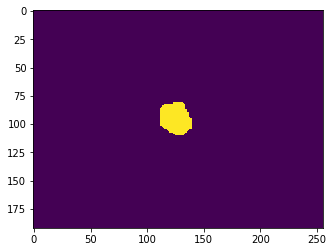

0.7396899883563702  step number is  8400  batch_size is  16
Currently on step 8500
the time is  951.943127 

Avg Jacc is:


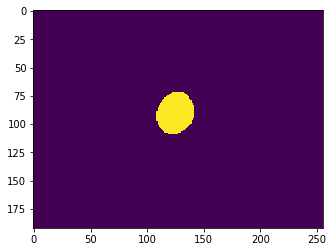

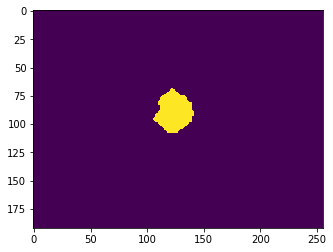

0.7689113910381611  step number is  8500  batch_size is  16
Currently on step 8600
the time is  963.054248 

Avg Jacc is:


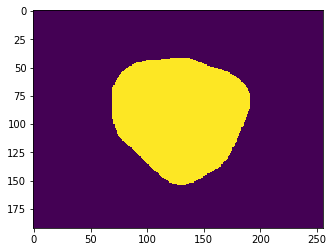

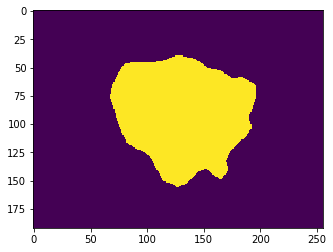

0.7694693932166466  step number is  8600  batch_size is  16
Currently on step 8700
the time is  974.217519 

Avg Jacc is:


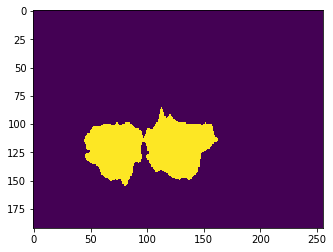

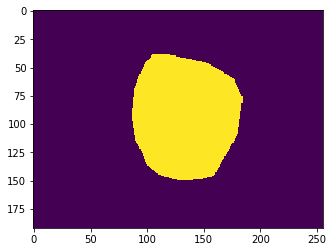

0.7499171917255109  step number is  8700  batch_size is  16
Currently on step 8800
the time is  985.5144280000001 

Avg Jacc is:


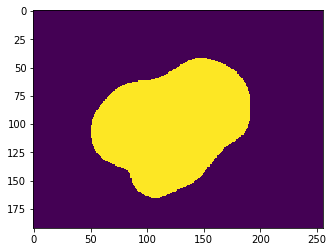

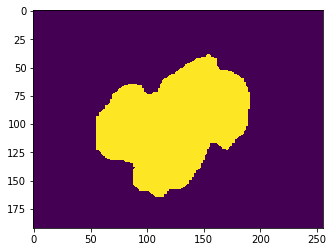

0.7649216871995193  step number is  8800  batch_size is  16
Currently on step 8900
the time is  996.6472580000001 

Avg Jacc is:


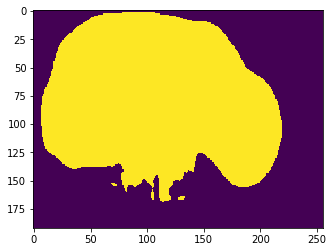

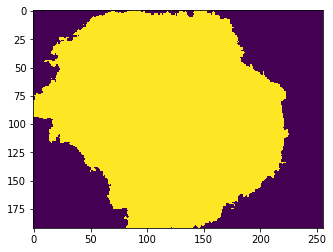

0.7645040658804086  step number is  8900  batch_size is  16
Currently on step 9000
the time is  1007.741349 

Avg Jacc is:


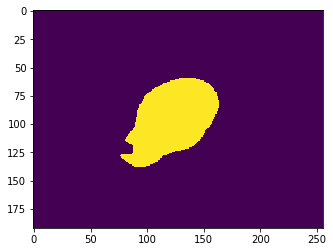

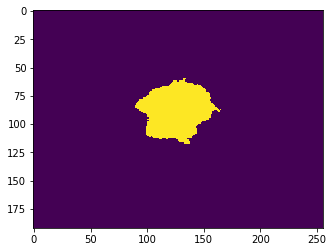

0.7623307448167067  step number is  9000  batch_size is  16
Currently on step 9100
the time is  1018.842808 

Avg Jacc is:


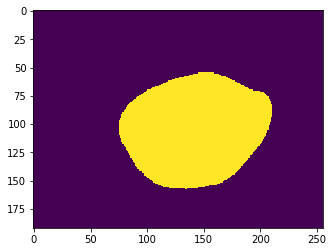

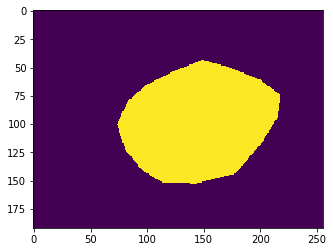

0.7550241323617789  step number is  9100  batch_size is  16
Currently on step 9200
the time is  1029.893167 

Avg Jacc is:


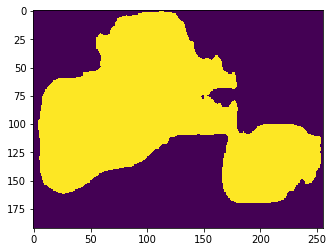

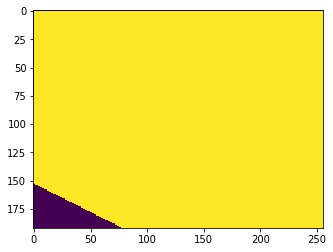

0.7779722947340745  step number is  9200  batch_size is  16
Currently on step 9300
the time is  1040.977715 

Avg Jacc is:


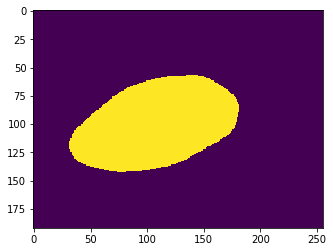

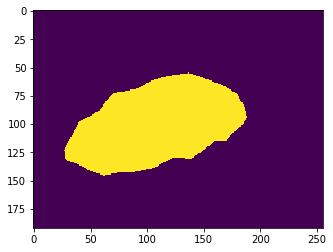

0.7530145498422476  step number is  9300  batch_size is  16
Currently on step 9400
the time is  1052.1108849999998 

Avg Jacc is:


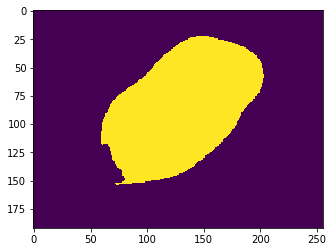

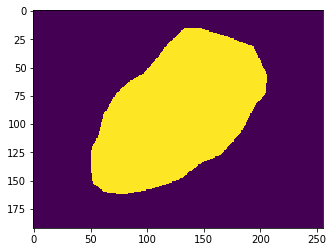

0.7609292837289664  step number is  9400  batch_size is  16
Currently on step 9500
the time is  1063.256747 

Avg Jacc is:


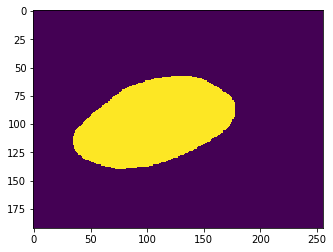

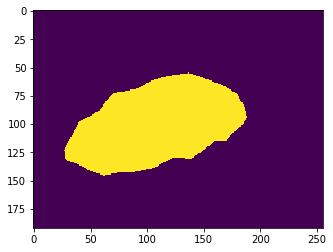

0.7499047499436599  step number is  9500  batch_size is  16
Currently on step 9600
the time is  1074.4292209999999 

Avg Jacc is:


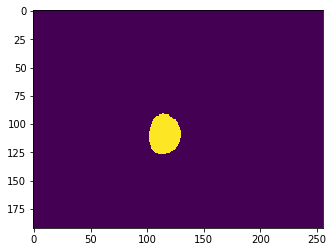

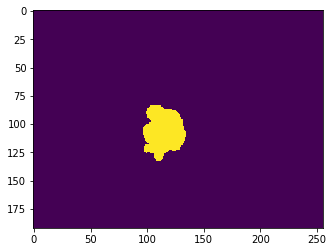

0.7481207040640024  step number is  9600  batch_size is  16
Currently on step 9700
the time is  1085.6210569999998 

Avg Jacc is:


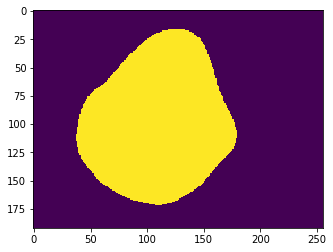

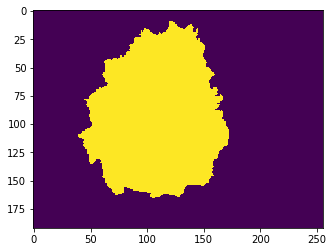

0.7555925809420072  step number is  9700  batch_size is  16
Currently on step 9800
the time is  1096.78174 

Avg Jacc is:


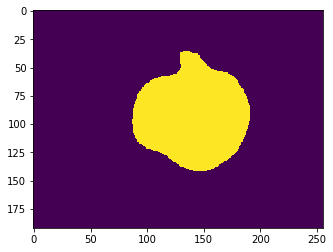

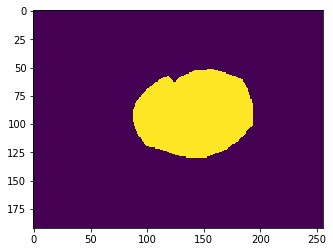

0.7459748488206129  step number is  9800  batch_size is  16
Currently on step 9900
the time is  1107.958874 

Avg Jacc is:


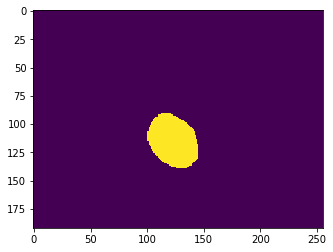

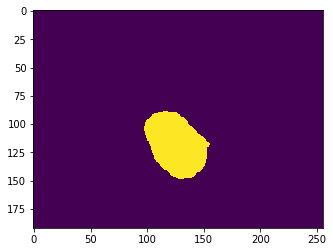

0.7490574763371394  step number is  9900  batch_size is  16
Currently on step 10000
the time is  1119.152447 

Avg Jacc is:


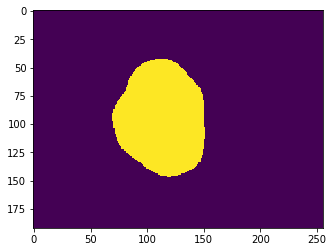

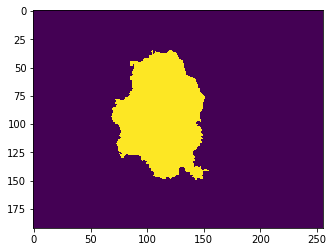

0.7554583035982572  step number is  10000  batch_size is  16
Currently on step 10100
the time is  1130.377313 

Avg Jacc is:


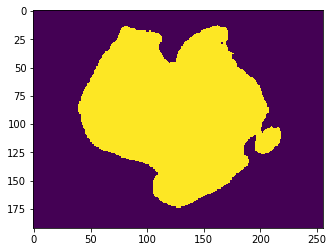

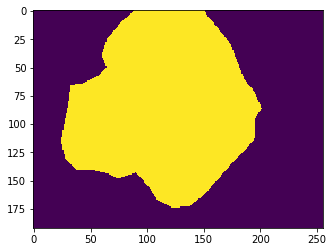

0.7592422485351562  step number is  10100  batch_size is  16
Currently on step 10200
the time is  1141.5268179999998 

Avg Jacc is:


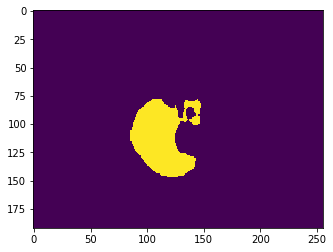

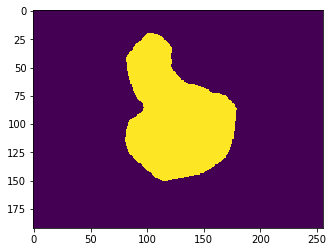

0.7367645263671875  step number is  10200  batch_size is  16
Currently on step 10300
the time is  1152.696375 

Avg Jacc is:


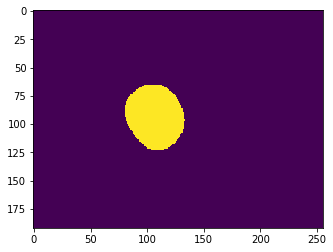

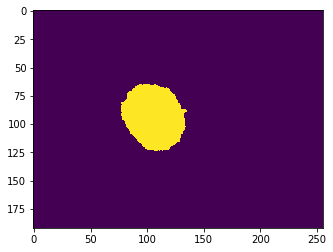

0.7698015653170072  step number is  10300  batch_size is  16
Currently on step 10400
the time is  1164.051704 

Avg Jacc is:


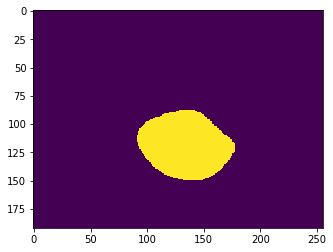

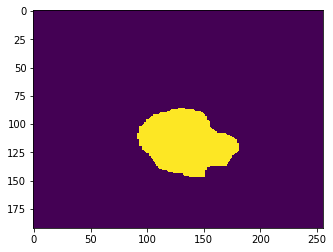

0.7617021413949819  step number is  10400  batch_size is  16


In [78]:
steps = 10500
import time
batch_size = 16
j_test = []
j_train = []

#use Cifar_helper to set up next batch
with tf.Session() as sess:
    print("starting init")
    sess.run(init)
    print("done init")
    
    start_time = time.clock()
    
    for i in range(steps): 
        batch_x, batch_y = mel.next_batch(batch_size)
        #print(i)
        #print("\n")
        
        #print("batch training labels shape is ", batch_y.shape)
        #print("batch training labels type is ", batch_y.dtype)
        #print("batch training labels are ", batch_y)
        #print("batch training data are ", batch_x)
        #image = batch_y.reshape(-1,21,28)[5,:,:]
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5,hold_prob2:0.5})
        #print("batch training prediction are ", batch_y)
        #image_pred = sess.run(y_pred,feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0} ).reshape(-1,21,28)[5,:,:]
        #image_pred = np.round(1/(1 + np.exp(-image_pred)))
        
        if i%100 == 0:
            print('Currently on step {}'.format(i))
            print("the time is ", time.clock() - start_time, "\n")
             #print("mel i is ", mel.i)
             #plt.imshow(image)
             #plt.show()
             #plt.imshow(image_pred)
             #plt.show()
            
            #print('Currently on step {}'.format(i))
            #print('Accuracy is:')
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            #acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            
            ####use with cross entropy####
            #pred = tf.round(1/(1 + tf.exp(-tf.reshape(y_pred, [-1,48,64]))))
            #true = tf.reshape(y_true, [-1,48,64])
          
            # Test the Train Model
            #matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))  ###REPLACE THIS LINE TO INCLUDE JACARD INDEX####
            pred_o = tf.math.round(pred)
            true_o = tf.math.round(true)
            
        


            intersect_o = tf.reduce_sum(tf.cast(true*pred_o, tf.float32), axis = [1,2])
            union_o = tf.reduce_sum(tf.cast(pred_o, tf.float32), axis = [1,2]) + tf.reduce_sum(tf.cast(true, tf.float32), axis = [1,2]) - intersect_o  #think this has an error
            jacc_o = intersect_o/union_o
            
            
            J_out_t = sess.run([jacc_o],feed_dict={x:batch_x,y_true:batch_y,hold_prob:1.0,hold_prob2:1.0})
            J_train = np.sum(J_out_t[0])/J_out_t[0].shape[0]
            j_train += [J_train]
            
            #acc = tf.reduce_mean(tf.cast(intersect,tf.float32))
            #print("test labels shape is ", mel.test_labels.shape)
            #print("\n")
            
            print('Avg Jacc is:')
            J_out = sess.run([jacc_o, pred_o, true_o],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
           
           
            rn = int(np.random.random()*J_out[1].shape[0])
           
            plt.imshow(J_out[1][rn, :, :])
            plt.show()
            plt.imshow(J_out[2][rn, :, :])
            plt.show()
            ##it cannot evaluate over the test set, the test set is too large...reduce size of test set
            
            J_test = np.sum(J_out[0])/J_out[0].shape[0]
            j_test += [J_test]
            
            print(J_test, " step number is ",  i, " batch_size is ", batch_size)
            #print("intersection is", J_out[2], "union is", J_out[3], "\n", "y_pred is ", J_out[4], "true is ", J_out[5], "sum_pred =",  J_out[6], "sum_true", J_out[7])
            #if i == 500:
                #batch_size = 20
            #if i == 25000:
                #batch_size = 200
            
            #print out Jacc for training set and test set, Save Jacc and entropy to variable,
            #print out step number
            
            #use larger pics
            #print out and analyse cross entropy
            #run with full training batch for several iterations
            #pred = sess.run(pred,feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0})
            
           
        if i == steps - 1:
            pred_mel = sess.run([pred],feed_dict={x:mel.test_images,y_true:mel.test_labels,hold_prob:1.0, hold_prob2:1.0})
            pred_pigment = sess.run([pred],feed_dict={x:pigs,hold_prob:1.0,hold_prob2:1.0})
            
        #save_path = saver.save(sess, "./model.ckpt")
        
        

In [79]:
J_out[1].shape

(130, 192, 256)

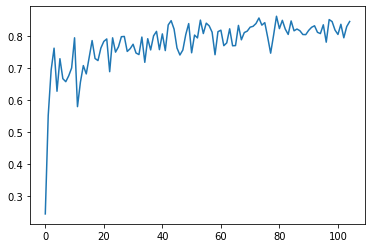

In [80]:
j_train = np.array(j_train)
j_test = np.array(j_test)
plt.plot(j_train)

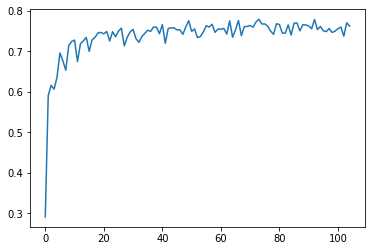

In [81]:
plt.plot(j_test)

(array([ 3.,  4.,  5.,  3.,  3.,  6., 11., 20., 36., 39.]),
 array([0.19126995, 0.26768428, 0.3440986 , 0.42051294, 0.49692726,
        0.5733416 , 0.6497559 , 0.72617024, 0.8025846 , 0.8789989 ,
        0.9554132 ], dtype=float32),
 <a list of 10 Patch objects>)

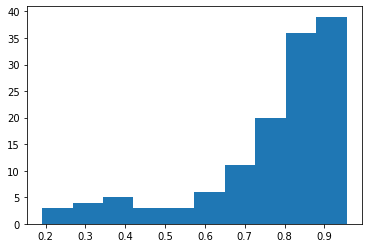

In [82]:
plt.hist(J_out[0])

(array([1., 0., 1., 0., 3., 3., 1., 3., 2., 2.]),
 array([0.70642656, 0.72931004, 0.7521935 , 0.775077  , 0.79796046,
        0.82084394, 0.84372735, 0.8666108 , 0.8894943 , 0.9123778 ,
        0.93526125], dtype=float32),
 <a list of 10 Patch objects>)

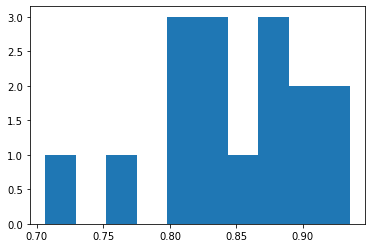

In [83]:
plt.hist(J_out_t[0])

In [84]:
#failure rate on test set:
fails = 0
for a in J_out[0]:
  if a < 0.65:
    fails += 1
    
rate = fails/J_out[0].shape[0]
rate

0.18461538461538463

## Great Job!

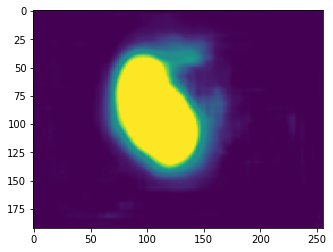

In [85]:
plt.imshow(pred_pigment[0][5,:,:])
plt.show()

In [86]:
pigs.shape

(28, 192, 256, 3)

In [87]:
pred_pigment[0].shape

(28, 192, 256)

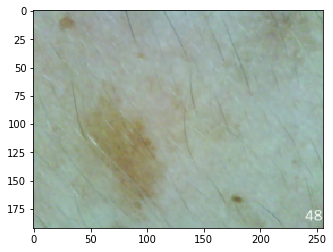

In [88]:
plt.imshow(pigment_image_show)
plt.show()

In [0]:
mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
mask[:,:,0] = pred_pigment[0][:,:,0]
mask[:,:,1] = pred_pigment[0][:,:,1]
mask[:,:,2] = pred_pigment[0][:,:,2]
#mask = 1-mask
#mask = mask.astype(int)

image = pigment_image_show
#image[mask] = 0
image2 = image*mask*255
image1 = image*(1- mask)*255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


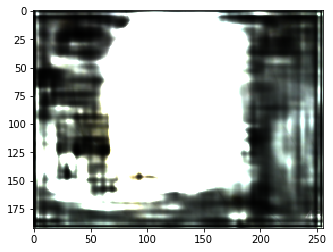

In [90]:
plt.imshow(image2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


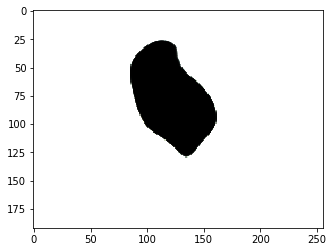

In [91]:
plt.imshow(image1)
plt.show()

In [92]:
image2[:,:,0].shape

(192, 256)

In [0]:
red = image2[:,:,0].reshape(-1)

(array([1.5849e+04, 4.3400e+03, 1.6020e+03, 1.0110e+03, 6.5200e+02,
        4.7800e+02, 4.1100e+02, 3.5000e+02, 2.9600e+02, 2.7600e+02,
        2.6400e+02, 2.1300e+02, 2.2800e+02, 2.4800e+02, 2.3600e+02,
        2.3400e+02, 2.2700e+02, 2.1700e+02, 2.6000e+02, 2.3300e+02,
        2.3400e+02, 1.5900e+02, 1.5700e+02, 1.4900e+02, 1.1800e+02,
        1.0600e+02, 1.1100e+02, 1.0700e+02, 1.0600e+02, 9.6000e+01,
        1.0100e+02, 8.8000e+01, 8.8000e+01, 8.1000e+01, 9.2000e+01,
        8.0000e+01, 8.9000e+01, 9.5000e+01, 8.4000e+01, 6.9000e+01,
        7.8000e+01, 8.1000e+01, 7.3000e+01, 6.8000e+01, 8.7000e+01,
        9.5000e+01, 8.4000e+01, 8.8000e+01, 7.3000e+01, 7.4000e+01,
        7.2000e+01, 6.1000e+01, 6.2000e+01, 6.6000e+01, 5.0000e+01,
        6.4000e+01, 4.1000e+01, 5.3000e+01, 4.6000e+01, 4.0000e+01,
        4.2000e+01, 3.9000e+01, 4.6000e+01, 4.0000e+01, 3.5000e+01,
        5.1000e+01, 3.3000e+01, 4.0000e+01, 3.1000e+01, 2.8000e+01,
        2.4000e+01, 3.3000e+01, 4.0000e+01, 4.20

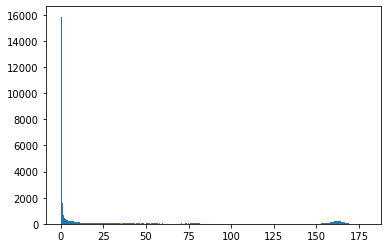

In [94]:
plt.hist(red, bins = 500, range = (0.1, red.max()))

In [0]:
plt.show()

In [0]:
a2 = np.average(red, weights = mask[:,:,0].reshape(-1))

In [97]:
a2

128.15307232470056

In [98]:
mask[0].shape

(256, 3)

In [0]:
red_norm = image1[:,:,0].reshape(-1)

(array([1.370e+02, 4.200e+01, 3.800e+01, 2.400e+01, 1.900e+01, 2.500e+01,
        1.100e+01, 1.300e+01, 1.500e+01, 1.400e+01, 1.000e+01, 1.400e+01,
        1.700e+01, 9.000e+00, 9.000e+00, 1.600e+01, 7.000e+00, 1.300e+01,
        5.000e+00, 9.000e+00, 7.000e+00, 8.000e+00, 1.200e+01, 9.000e+00,
        6.000e+00, 7.000e+00, 3.000e+00, 6.000e+00, 1.000e+01, 8.000e+00,
        1.300e+01, 1.000e+01, 4.000e+00, 1.000e+01, 9.000e+00, 4.000e+00,
        1.000e+01, 1.100e+01, 7.000e+00, 1.100e+01, 9.000e+00, 9.000e+00,
        6.000e+00, 8.000e+00, 7.000e+00, 1.400e+01, 7.000e+00, 7.000e+00,
        7.000e+00, 4.000e+00, 9.000e+00, 8.000e+00, 7.000e+00, 1.100e+01,
        1.400e+01, 9.000e+00, 6.000e+00, 9.000e+00, 6.000e+00, 8.000e+00,
        6.000e+00, 1.200e+01, 1.000e+01, 9.000e+00, 1.300e+01, 7.000e+00,
        1.700e+01, 1.500e+01, 8.000e+00, 1.200e+01, 1.100e+01, 6.000e+00,
        8.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 1.100e+01, 1.100e+01,
        1.100e+01, 1.200e+01, 8.000e+0

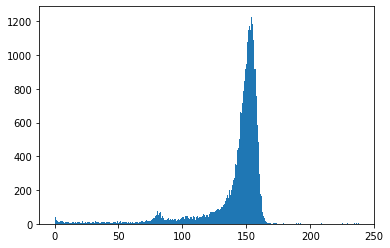

In [100]:
plt.hist(red_norm, bins = 500, range = (0.1, red_norm.max()))

In [0]:
plt.show()

In [0]:
mask_inv = 1-mask

In [0]:
a1 = np.average(red_norm, weights =mask_inv[:,:,0].reshape(-1))

In [104]:
mask_inv.shape

(192, 256, 3)

In [105]:
a1

146.04280248801928

In [106]:
a1 - a2

17.889730163318717

In [0]:
blue = image2[:,:,2].reshape(-1)

In [0]:
blue_norm = image1[:,:,2].reshape(-1)

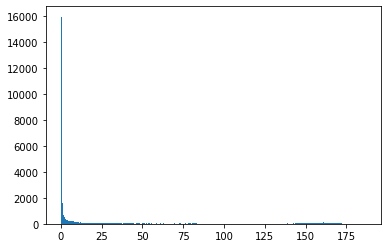

In [109]:
plt.hist(blue, bins = 500, range = (0.1, blue.max()))
plt.show()

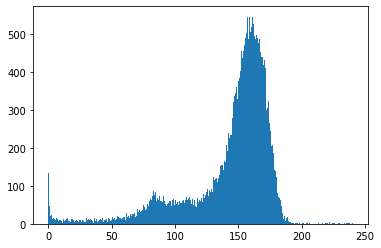

<Figure size 432x288 with 0 Axes>

In [110]:
plt.hist(blue_norm, bins = 500, range = (0.1, blue_norm.max()))
plt.figure()
plt.show()

In [0]:
def measure_progress(pigs,masks):
    blue_pigs = []
    blue_norms = []
    imagesp = []
    imagesn = []
    i = 0
    for pig in pigs:
        mask = np.zeros([192,256,3])#np.vstack([pred_pigment[0],pred_pigment[0],pred_pigment[0]])
        mask[:,:,0] = pred_pigment[0][i,:,:]
        mask[:,:,1] = pred_pigment[0][i,:,:]
        mask[:,:,2] = pred_pigment[0][i,:,:]
        mask_inv = 1- mask
        imagep = pig*mask*255
        imagen = pig*(1- mask)*255
        imagesp += [imagep]
        imagesn += [imagen]
        blue_norm = imagen[:,:,2].reshape(-1)
        blue_pig = imagep[:,:,2].reshape(-1)
        an = np.average(blue_norm, weights =mask_inv[:,:,2].reshape(-1))
        ap = np.average(blue_pig, weights =mask[:,:,2].reshape(-1))
        blue_pigs += [ap]
        blue_norms += [an]
        i+=1
    blue_pigs = np.array(blue_pigs)
    blue_norms = np.array(blue_norms)
    return(blue_pigs, blue_norms, imagesp, imagesn)

In [0]:
pigmented, normal, imagesp, imagesn = measure_progress(pigs,pred_pigment)

In [113]:
J_out[1].shape

(130, 192, 256)

In [114]:
pigmented

array([105.08866156, 112.43972411, 100.2797349 ,  93.4269887 ,
       110.02297619, 107.69272032,  85.40783446, 101.49979103,
        85.71051715,  87.62533123,  90.6899945 , 101.74162736,
       115.46386762,  96.63946836,  94.00728036,  87.33326279,
       101.92309424,  93.99066926,  90.04018698, 115.63680402,
        96.17926937, 113.28830375, 108.65913596, 106.67639022,
        95.31859689, 111.74138123, 115.36434232, 123.80903121])

In [115]:
normal

array([154.0587592 , 158.43709648, 155.56495807, 151.41742061,
       156.4350815 , 161.40005666, 150.32618481, 159.57772889,
       142.10401848, 149.88049311, 141.54260338, 144.79001923,
       156.6817119 , 129.0743465 , 153.08297085, 142.91505938,
       160.86387381, 149.64775701, 143.47472024, 158.95732267,
       151.36058694, 162.87903446, 148.42025421, 154.21386978,
       145.21343686, 156.2042531 , 151.56189165, 163.38719101])

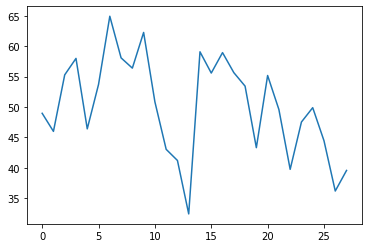

In [116]:
plt.plot(normal - pigmented)

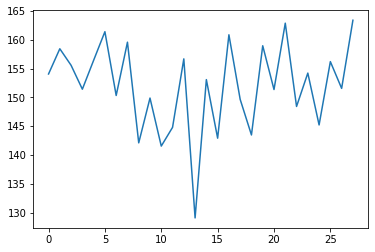

In [117]:
plt.plot(normal)

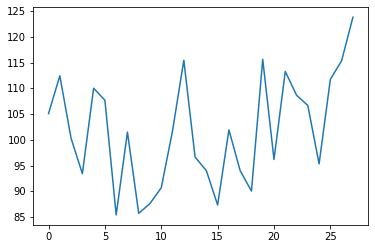

In [118]:
plt.plot(pigmented)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


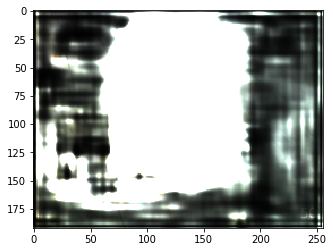

In [119]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


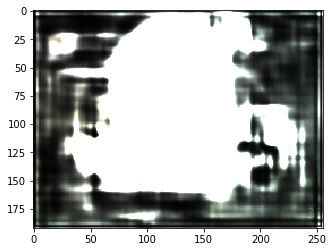

In [120]:
plt.imshow(imagesp[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


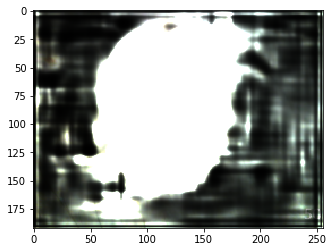

In [121]:
plt.imshow(imagesp[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


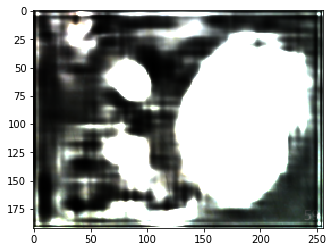

In [122]:
plt.imshow(imagesp[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


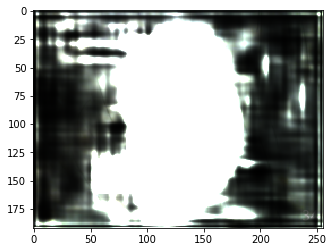

In [123]:
plt.imshow(imagesp[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


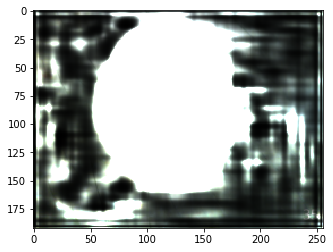

In [124]:
plt.imshow(imagesp[5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


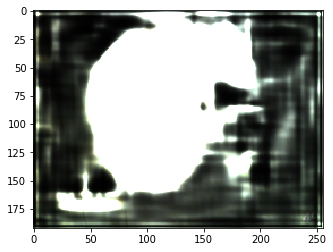

In [125]:
plt.imshow(imagesp[6])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


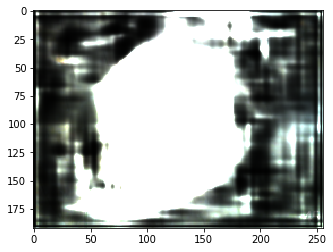

In [126]:
plt.imshow(imagesp[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


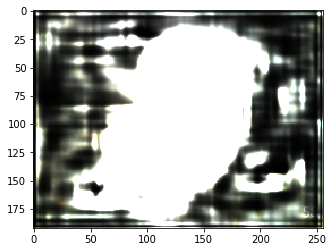

In [127]:
plt.imshow(imagesp[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


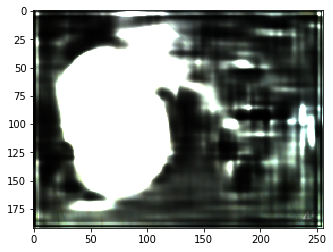

In [128]:
plt.imshow(imagesp[9])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


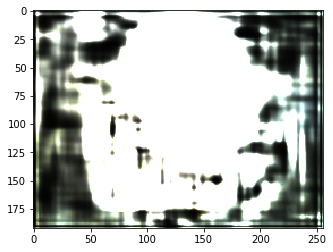

In [129]:
plt.imshow(imagesp[10])

In [130]:
pigmented[0]

105.08866155738211

In [131]:
pigmented[10]

90.68999450460097

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


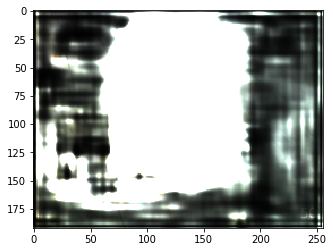

In [132]:
plt.imshow(imagesp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


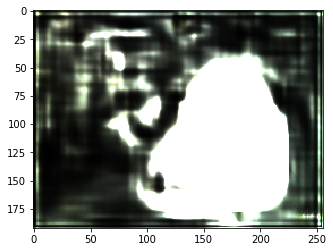

In [133]:
plt.imshow(imagesp[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


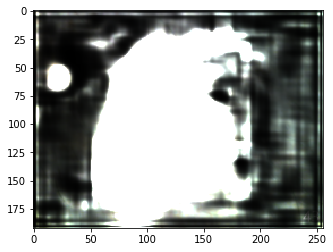

In [134]:
plt.imshow(imagesp[12])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


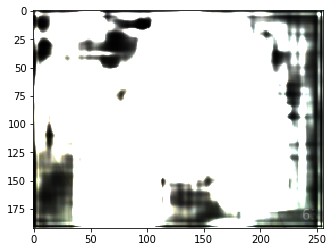

In [135]:
plt.imshow(imagesp[13])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


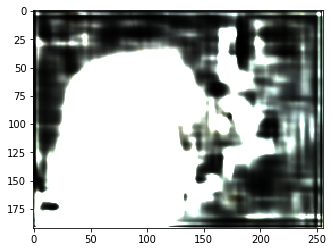

In [136]:
plt.imshow(imagesp[14])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


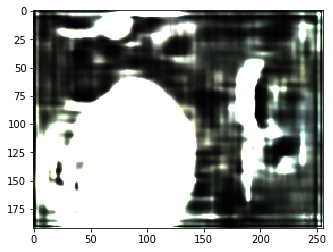

In [137]:
plt.imshow(imagesp[15])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


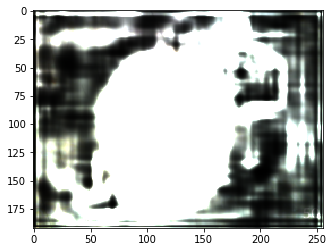

In [138]:
plt.imshow(imagesp[16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


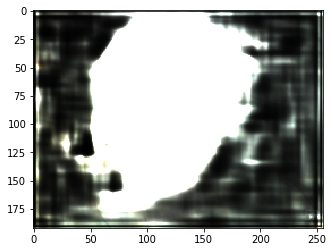

In [139]:
plt.imshow(imagesp[17])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


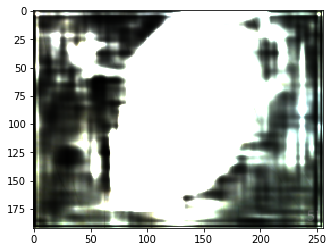

In [140]:
plt.imshow(imagesp[18])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


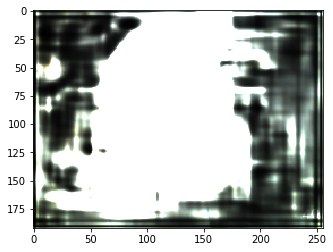

In [141]:
plt.imshow(imagesp[19])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


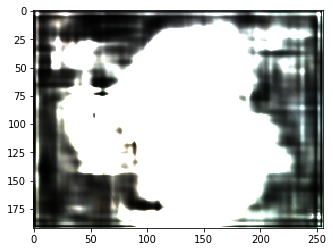

In [142]:
plt.imshow(imagesp[20])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


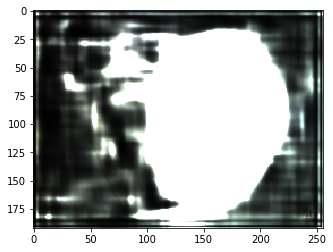

In [143]:
plt.imshow(imagesp[21])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


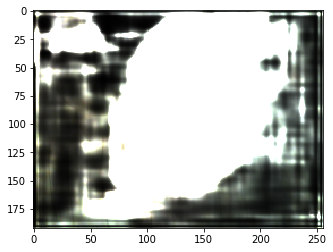

In [144]:
plt.imshow(imagesp[22])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


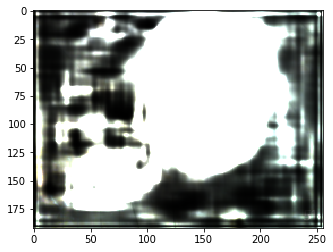

In [145]:
plt.imshow(imagesp[23])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


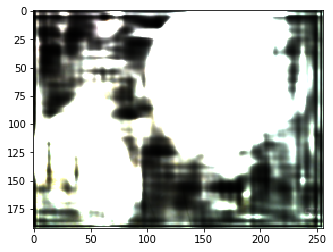

In [146]:
plt.imshow(imagesp[24])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


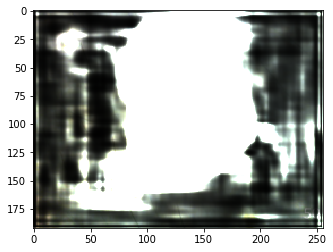

In [147]:
plt.imshow(imagesp[25])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


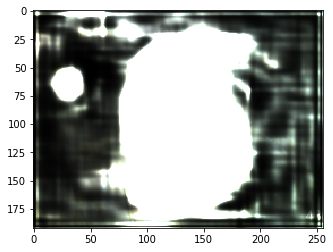

In [148]:
plt.imshow(imagesp[26])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


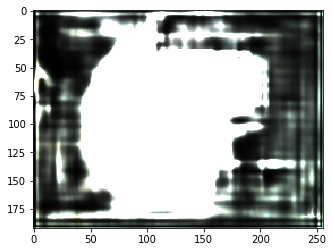

In [149]:
plt.imshow(imagesp[27])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


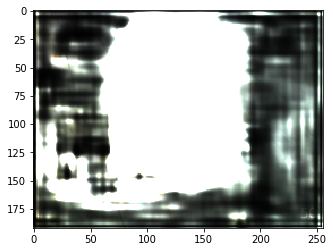

In [150]:
plt.imshow(imagesp[0])

In [0]:
test = normal - pigmented

In [0]:
test = np.hstack([test[0:2], test[4:8], test[9:21], test[22:26], test[27]])

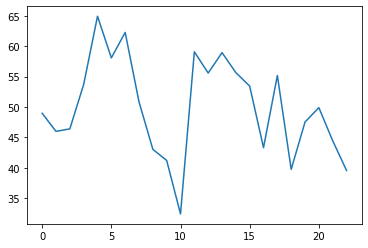

In [153]:
plt.plot(test)

In [154]:
filenames

['ISIC_0000000r_segmentation.png',
 'ISIC_0000000f_segmentation.png',
 'ISIC_0000000_segmentation.png',
 'ISIC_0000001f_segmentation.png',
 'ISIC_0000008r_segmentation.png',
 'ISIC_0000008_segmentation.png',
 'ISIC_0000007_segmentation.png',
 'ISIC_0000001_segmentation.png',
 'ISIC_0000007r_segmentation.png',
 'ISIC_0000008f_segmentation.png',
 'ISIC_0000001r_segmentation.png',
 'ISIC_0000007f_segmentation.png',
 'ISIC_0000016r_segmentation.png',
 'ISIC_0000016f_segmentation.png',
 'ISIC_0000016_segmentation.png',
 'ISIC_0000024f_segmentation.png',
 'ISIC_0000024_segmentation.png',
 'ISIC_0000025f_segmentation.png',
 'ISIC_0000024r_segmentation.png',
 'ISIC_0000029r_segmentation.png',
 'ISIC_0000029_segmentation.png',
 'ISIC_0000028r_segmentation.png',
 'ISIC_0000025r_segmentation.png',
 'ISIC_0000025_segmentation.png',
 'ISIC_0000029f_segmentation.png',
 'ISIC_0000028f_segmentation.png',
 'ISIC_0000028_segmentation.png',
 'ISIC_0000031r_segmentation.png',
 'ISIC_0000031f_segmentation.

In [0]:
normal = np.hstack([normal[0:2], normal[12], normal[21:28], normal[2:12], normal[13:20]])

In [0]:
pigmented = np.hstack([pigmented[0:2], pigmented[12], pigmented[21:28], pigmented[2:12], pigmented[13:20]])

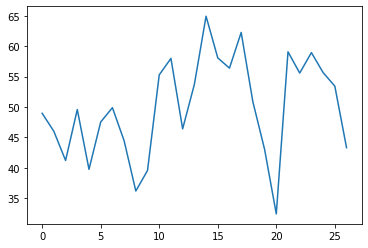

In [157]:
plt.plot(normal-pigmented)

In [0]:
## 26, 21, 2, 3, 8 -> 8,3,10,11,16

In [159]:
normal.shape

(27,)

In [0]:
normal = np.hstack([normal[0:3], normal[4:8], normal[9], normal[12:16], normal[17:27]])

In [0]:
pigmented = np.hstack([pigmented[0:3], pigmented[4:8], pigmented[9], pigmented[12:16], pigmented[17:27]])

In [0]:
new_files_names = np.hstack([filenames[0:3], filenames[4:8], filenames[9], filenames[12:16], filenames[17:27]])

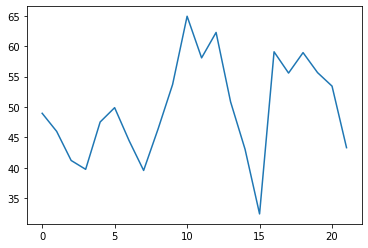

In [163]:
plt.plot(normal-pigmented)

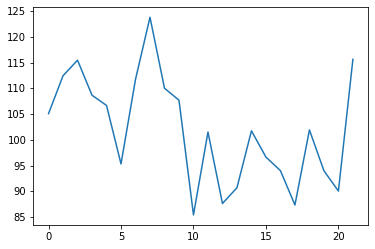

In [164]:
plt.plot(pigmented)

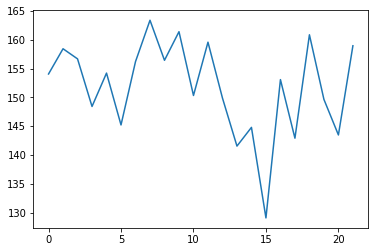

In [165]:
plt.plot(normal)

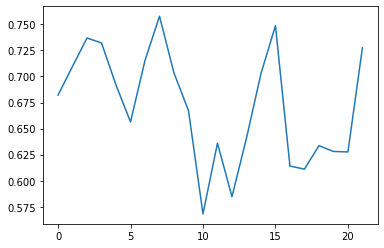

In [166]:
plt.plot(pigmented/normal)

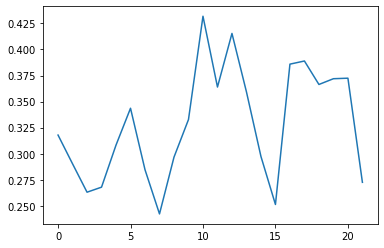

In [167]:
plt.plot((normal - pigmented)/normal)

In [168]:
new_files_names

array(['ISIC_0000000r_segmentation.png', 'ISIC_0000000f_segmentation.png',
       'ISIC_0000000_segmentation.png', 'ISIC_0000008r_segmentation.png',
       'ISIC_0000008_segmentation.png', 'ISIC_0000007_segmentation.png',
       'ISIC_0000001_segmentation.png', 'ISIC_0000008f_segmentation.png',
       'ISIC_0000016r_segmentation.png', 'ISIC_0000016f_segmentation.png',
       'ISIC_0000016_segmentation.png', 'ISIC_0000024f_segmentation.png',
       'ISIC_0000025f_segmentation.png', 'ISIC_0000024r_segmentation.png',
       'ISIC_0000029r_segmentation.png', 'ISIC_0000029_segmentation.png',
       'ISIC_0000028r_segmentation.png', 'ISIC_0000025r_segmentation.png',
       'ISIC_0000025_segmentation.png', 'ISIC_0000029f_segmentation.png',
       'ISIC_0000028f_segmentation.png', 'ISIC_0000028_segmentation.png'],
      dtype='<U30')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


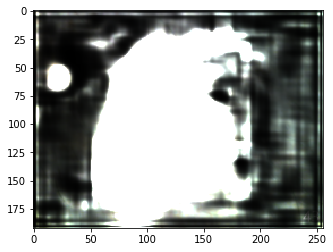

In [169]:
plt.imshow(imagesp[12])